# AutoML using H2o_by_Sanat Popli_002201005

# Abstract

I'm going do AutoML (H2O) with Diabetes dataset.
First we will commit some mistakes and see how important is to check the output. I have tried to do all the explainations of output and codes. We will first check with GLM and GBM methods and then AutoML.

# About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

# About this file

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No


#Classifying dependent and independent variables
The dependent variable in the dataset is DiabetesPedigreeFunction and the predictor variables in the dataset are
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,OUTCOME

In [24]:
!pip install opendatasets

# I have installed opendatasets above just to retrive the data from kaggle and this is not necessary step this can be ignored because we have to import files through h2o module in this assignment/file.

In [25]:
!pip install h2o

#Here I have installed h2o to perform various functions present in h2o module.

In [26]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
dataset='https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'

In [29]:
import opendatasets as od

In [30]:
od.download(dataset)

Skipping, found downloaded files in "./diabetes-dataset" (use force=True to force download)


In [31]:
import os

In [32]:
data_dir='./diabetes-dataset'

In [33]:
os.listdir(data_dir)

['diabetes.csv']

# Correlation for dataset
#Carefully observing the correlation in order to check the multicollinearity,
Which is if lesser than (<=0.7) in every case ,that simply means there is no multi collinearity.

<Axes: >

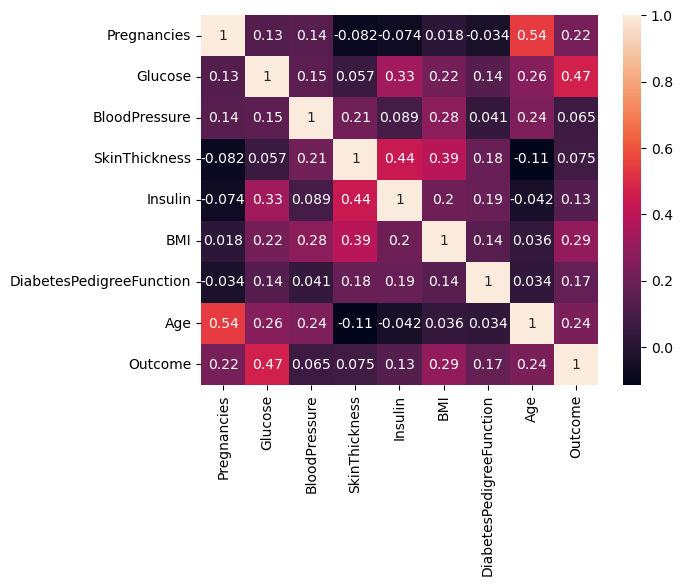

In [34]:
#observing correlation
data_for_corr = pd.read_csv( './diabetes-dataset/diabetes.csv' )
sns.heatmap(data_for_corr.corr(),annot=True)

In [35]:
data_for_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Initialising the h2o with init function
#From here the h2o ML algorithm begin ,and we will take care of importing dataset files through h2o and not via pandas.

In [36]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 7 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.4
H2O_cluster_version_age:,30 days
H2O_cluster_name:,H2O_from_python_sanatpopli_ap0p0e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.968 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


# The purpose of this below code is to provide flexibility in generating plots.
When interactive is set to True, Matplotlib will generate plots in an interactive mode, 
which is useful for visualizing and exploring data within a Jupyter Notebook or similar environment.
If interactive is set to False, it configures Matplotlib to generate plots in a non-interactive mode,
which may be preferred when you want to save static images of plots without displaying them interactively.

interactive = True: This line sets the variable interactive to True, 
indicating that interactive plots should be generated.

In [37]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

#The h2o.import_file function is typically used to load a dataset into the H2O.ai environment for further analysis and machine learning tasks

In [38]:
## Please check we are importing dataset with H2O and not Pandas 
data = h2o.import_file( './diabetes-dataset/diabetes.csv' )

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In data science and analysis, the data.describe() command is frequently used with libraries such as H2O to produce information about the dataset that has been imported into the data object, including summary statistics. Typically, data.describe() yields a summary of the dataset together with statistics for each of the numerical columns when it is executed. For every numerical attribute in the dataset, 

In [39]:
# Data exploration and munging. Generate scatter plots 

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

1)scatter_plot(data, x, y, max_points = 1000, fit = True): This function takes several arguments:

2)data: The dataset on which the scatter plot and regression fit will be generated.

3)x and y: The names of the two variables (columns) from the dataset that will be used for the scatter plot.

4)max_points: An optional argument that specifies the maximum number of points to be included in the scatter plot. It is set to a default value of 1000.

5)fit: An optional boolean argument that, when set to True, fits a linear regression line to the scatter plot. By default, it is set to True.

Inside the function, it performs the following steps: If fit is True, it trains a Generalized Linear Model (GLM) with a Gaussian family using H2O (H2OGeneralizedLinearEstimator) on the specified variables x and y. It creates a subset of the dataset by randomly selecting a maximum of max_points data points from the data based on a uniform random distribution. Converts the H2O data frame to a Pandas data frame (df_py) for visualization. If fit is True, it calculates the regression coefficients (coeff) from the GLM model and stores them. If the x variable is of the "object" data type (categorical variable), it generates a box-and-whisker plot for y by each category of x. Otherwise, it generates a scatter plot between x and y. If fit is True, it also plots the linear regression line. If interactive (global variable) is True, it displays the generated plot using Matplotlib (plt.show()).

In [40]:
data.describe()

Rows:768
Cols:9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


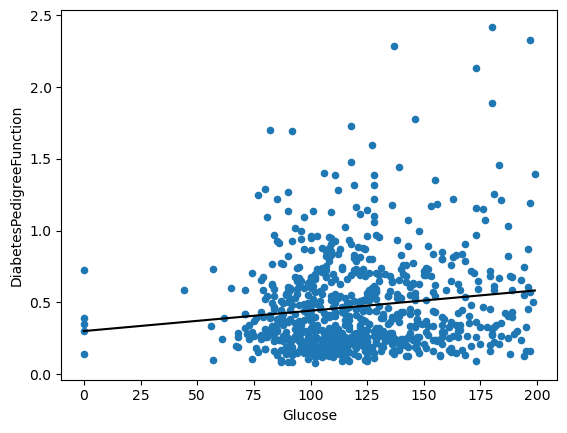

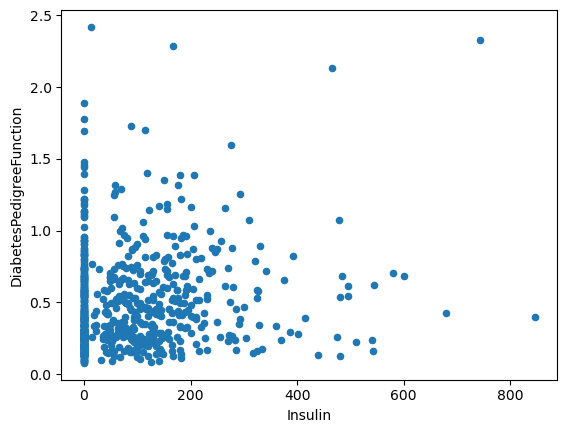

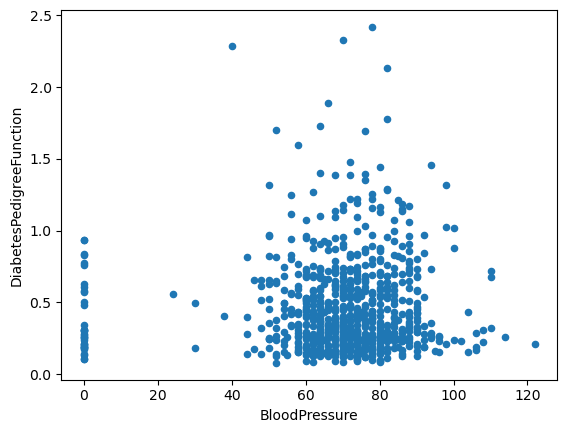

In [41]:
scatter_plot(data, "Glucose", "DiabetesPedigreeFunction", fit = True)
scatter_plot(data, "Insulin", "DiabetesPedigreeFunction", max_points = 5000, fit = False)
scatter_plot(data, "BloodPressure", "DiabetesPedigreeFunction", max_points = 5000, fit = False)



1)scatter_plot(data, "Glucose", "DiabetesPedigreeFunction", fit=True): This generates a scatter plot with "Glucose" on the x-axis and "DiabetesPedigreeFunction" on the y-axis. The fit=True parameter indicates that a linear regression line or best-fit line is drawn on the scatter plot.

2)scatter_plot(data, "Insulin", "DiabetesPedigreeFunction", max_points=5000, fit=False): This generates a scatter plot with "Insulin" on the x-axis and "DiabetesPedigreeFunction" on the y-axis. The max_points=5000 parameter suggests that only a maximum of 5000 data points will be plotted. The fit=False parameter means that no regression line will be drawn.

3)scatter_plot(data, "BloodPressure", "DiabetesPedigreeFunction", max_points=5000, fit=False): Similar to the second call, this generates a scatter plot with "BloodPressure" on the x-axis and "DiabetesPedigreeFunction" on the y-axis, with the same max_points and fit settings.

In [42]:
# Create a test/train split
train,test = data.split_frame([.9])

train, test = data.split_frame([.9]): This line of code splits your dataset, represented by the data variable, into two parts:
train: This part contains approximately 90% of the data, as specified by [.9]. The [.9] argument indicates that I want to allocate 90% of the data to the training set.
test: This part contains the remaining approximately 10% of the data (since 100% - 90% = 10%). This will be used as the test set for evaluating your models.


In [43]:
#  Set response variable and your choice of predictor variables
myY = "DiabetesPedigreeFunction"
myX = ["DiabetesPedigreeFunction","Glucose","Insulin","BloodPressure"]

1)myY = "DiabetesPedigreeFunction": This line specifies the response variable, which is the target variable or the variable I want to predict. In this case, it is set to "DiabetesPedigreeFunction."

2)myX = ["DiabetesPedigreeFunction", "Glucose", "Insulin", "BloodPressure"]: Here, you define the predictor variables, which are the features or independent variables used to predict the response variable. You've selected four predictor variables: "DiabetesPedigreeFunction," "Glucose," "Insulin," and "BloodPressure." These variables will be used in your machine learning models to make predictions based on their values.

# Before starting the GLM Model let me explain what GLM is

A Generalized Linear Model (GLM) is a type of statistical model that extends the concept of linear regression to a broader class of models, allowing for more flexibility in modeling different types of data. GLMs were introduced by Nelder and Wedderburn in 1972. 

Here are some key characteristics and concepts related to GLMs:

Linear Relationship: Like linear regression, GLMs assume that there is a linear relationship between the predictor variables (independent variables) and the response variable (dependent variable). However, this linearity assumption is applied to a transformed function of the expected response, not the response itself.

Generalized Linear Model Components: A GLM consists of three main components:
Random Component (Distribution Family): This component describes the probability distribution of the response variable, which can be any distribution from the exponential family (e.g., Gaussian, Poisson, Binomial, Gamma). The choice of distribution family depends on the nature of the response variable.
Systematic Component (Linear Predictor): The linear predictor is a linear combination of the predictor variables, with coefficients to be estimated. It's usually denoted as η (eta). The link function connects the expected response to the linear predictor.

Link Function: The link function relates the expected value of the response variable to the linear predictor. It transforms the linear predictor to the appropriate scale for the response variable. Common link functions include the identity, logit, log, and inverse functions.
Fitting the Model: GLMs are typically fit to the data using the method of maximum likelihood estimation (MLE) to estimate the model parameters (coefficients) that best describe the relationship between the predictors and the response.

Applications: GLMs are versatile and can be used for a wide range of applications, including linear regression (Gaussian distribution), logistic regression (Binomial distribution), Poisson regression (Poisson distribution), and gamma regression (Gamma distribution), among others. They are well-suited for regression analysis and classification problems.

Model Interpretability: GLMs offer interpretable coefficients that describe the strength and direction of the relationships between predictor variables and the response. The interpretation depends on the choice of the distribution family and the link function.
Assumptions: While GLMs relax some of the assumptions of classical linear regression, they still have their own set of assumptions, such as the correct choice of the distribution family and the appropriate link function. Violations of these assumptions can affect the model's accuracy.
Extensions: Generalized Linear Models have been extended to include Generalized Additive Models (GAMs) and Generalized Linear Mixed Models (GLMMs), which further expand their capabilities for modeling complex relationships in data.


In [44]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698966468039_3


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.255E-4 )  3                             3                              1                       py_23_sid_bf05

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.10985625509845608
RMSE: 0.3314457046010041
MAE: 0.2452448157486155
RMSLE: 0.19876272219346078
Mean Residual Deviance: 0.10985625509845608
R^2: 0.04516596594638145
Null degrees of freedom: 678
Residual degrees of freedom: 675
Null deviance: 78.12079853833878
Residual deviance: 74.59239721185168
AIC: 437.29098370842325

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.06984591884940869
RMSE: 0.26428378468874836
MAE: 0.20959439362980392
RMSLE: 0.17007563473787327
Mean Residual Deviance: 0.06984591884940869
R^2: -0.022516459632423658
Null degrees of freedom: 88
Residual degrees of freedom: 85
Null deviance: 6.0794198965585595
Residual deviance: 6.216286777597373
AIC: 25.70079652227096

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae        training_r2          validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  ------------------  -------------------  -------------------  ---------------------  -------------------  ---------------------
    2023-11-02 21:16:44  0.000 sec   0             78.12079743740796          0.11505272082092483
    2023-11-02 21:16:44  0.044 sec   1                                                             0.3314457046010041  0.10985625509845608  0.2452448157486155  0.04516596594638145  0.26428378468874836  0.06984591884940869    0.20959439362980392  -0.022516459632423658

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Insulin        0.0507834              1                    0.552591
Glucose        0.0360951              0.710767             0.392763
BloodPressure  0.00502195             0.0988896            0.0546455

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# In this part of the code, I am building a simple Generalized Linear Model (GLM) using H2O. Let's break down what this code does:

a)data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True): I create an instance of the H2OGeneralizedLinearEstimator class, which is used to build generalized linear models. I specify the model parameters:

b)family="gaussian": This parameter specifies the distribution family for the GLM. In this case, I am using a Gaussian distribution, which is appropriate for regression tasks where the response variable is continuous and normally distributed.

c)standardize=True: This parameter indicates that the predictor variables should be standardized before fitting the model. Standardization involves scaling the variables to have a mean of 0 and a standard deviation of 1. It can help improve model convergence and interpretability.

d)data_glm.train(x=myX, y=myY, training_frame=train, validation_frame=test): You train the GLM model using the train method of the data_glm object. Here's what each argument does:
x=myX: This specifies the predictor variables you defined earlier, which will be used to make predictions.
y=myY: This specifies the response variable, which is the variable you want to predict.
training_frame=train: You use the train dataset as the training data for building the model. The train dataset is typically larger and used to train the model.

e)validation_frame=test: You use the test dataset for validation, which helps assess the model's performance on data it hasn't seen during training. This can be used to evaluate the model's generalization ability.

##Lets focus on GBM theory first-

A Gradient Boosting Machine (GBM) is a type of machine learning model that belongs to the ensemble learning family. GBM combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model.

In [45]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,829.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-11-02 21:16:54,0.009 sec,0.0,0.3391942,0.2523057,0.1150527,0.2613582,0.2090751,0.0683081
,2023-11-02 21:16:54,0.058 sec,1.0,0.3379501,0.2510913,0.1142103,0.2592709,0.2076510,0.0672214
,2023-11-02 21:16:54,0.065 sec,2.0,0.3369390,0.2500538,0.1135279,0.2575776,0.2063693,0.0663462
,2023-11-02 21:16:54,0.067 sec,3.0,0.3359945,0.2496677,0.1128923,0.2575301,0.2062147,0.0663218
,2023-11-02 21:16:54,0.070 sec,4.0,0.3351563,0.2492779,0.1123297,0.2576540,0.2068508,0.0663856
,2023-11-02 21:16:54,0.072 sec,5.0,0.3343555,0.2483251,0.1117936,0.2563885,0.2058093,0.0657351
,2023-11-02 21:16:54,0.074 sec,6.0,0.3336375,0.2479822,0.1113140,0.2565420,0.2057565,0.0658138
,2023-11-02 21:16:54,0.077 sec,7.0,0.3329562,0.2472037,0.1108598,0.2554908,0.2049367,0.0652755


# Let's break down what this code does:

1)data_gbm = H2OGradientBoostingEstimator(balance_classes=True, ntrees=10, max_depth=1, learn_rate=0.1, min_rows=2): I create an instance of the H2OGradientBoostingEstimator class, which is used to build Gradient Boosting Machine models. I specify several model parameters:

2)balance_classes=True: This parameter balances the class distribution, which is particularly useful in classification tasks when the classes are imbalanced. It helps ensure that the model pays equal attention to each class during training.

3)ntrees=10: This parameter determines the number of trees (weak learners) that will be created in the ensemble. In this case, I am building a GBM model with 10 trees.

4)max_depth=1: This parameter sets the maximum depth of each tree in the ensemble. A value of 1 indicates that the trees are shallow, with a maximum of one split node, making them weak learners.

5)learn_rate=0.1: The learning rate controls the step size when updating the model parameters during each iteration. A smaller learning rate can lead to more stable training but may require more iterations.
min_rows=2: This parameter sets the minimum number of observations required to create a new split in a tree. It can help prevent overfitting by requiring a certain amount of data in each leaf node.
data_gbm.train(x=myX, y=myY, training_frame=train, validation_frame=test): You train the GBM model using the train method of the data_gbm object. Here's what each argument does:

6)x=myX: This specifies the predictor variables I defined earlier, which will be used to make predictions.

7)y=myY: This specifies the response variable, which is the variable I want to predict.

8)training_frame=train: I use the train dataset as the training data for building the model. The train dataset is typically larger and used to train the model.

9)validation_frame=test: I used the test dataset for validation, which helps assess the model's performance on data it hasn't seen during training. This can be used to evaluate the model's generalization ability.

In [46]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor     |   Normalized Coefficient |
|---------------+--------------------------|
| Intercept     |               0.471822   |
| Insulin       |               0.0507834  |
| Glucose       |               0.0360951  |
| BloodPressure |               0.00502195 |


[('Insulin', 10.359525680541992, 1.0, 0.5414795977675553),
 ('Glucose', 8.772359848022461, 0.8467916503647788, 0.4585204022324447),
 ('BloodPressure', 0.0, 0.0, 0.0)]

I am calculating variable importances from both the Generalized Linear Model (GLM) and the Gradient Boosting Machine (GBM) models. Variable importances help to understand which predictor variables have the most significant impact on the model's predictions.

The purpose of calculating and inspecting variable importances is to identify which predictor variables have the most significant influence on the model's predictions. This information can be used for feature selection, model interpretation, and understanding the drivers of the model's output. Variable importances are often used for identifying key features in predictive modeling tasks.
 

In [24]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_extract_scoring_history',

# Using the dir(data_glm) statement provides a list of the attributes, methods, and properties associated with the data_glm object, which is an instance of the H2OGeneralizedLinearEstimator class in H2O. 

Here's what you might find in the list of attributes and methods when you run dir(data_glm):

Attributes: These are typically properties or data associated with the object, and they provide information about the model or its configuration. Common attributes might include information about model parameters, training statistics, and model performance metrics.

Methods: These are functions that can be called on the object. They allow you to perform actions or operations related to the model. Common methods might include fitting the model, making predictions, and accessing model-specific information.


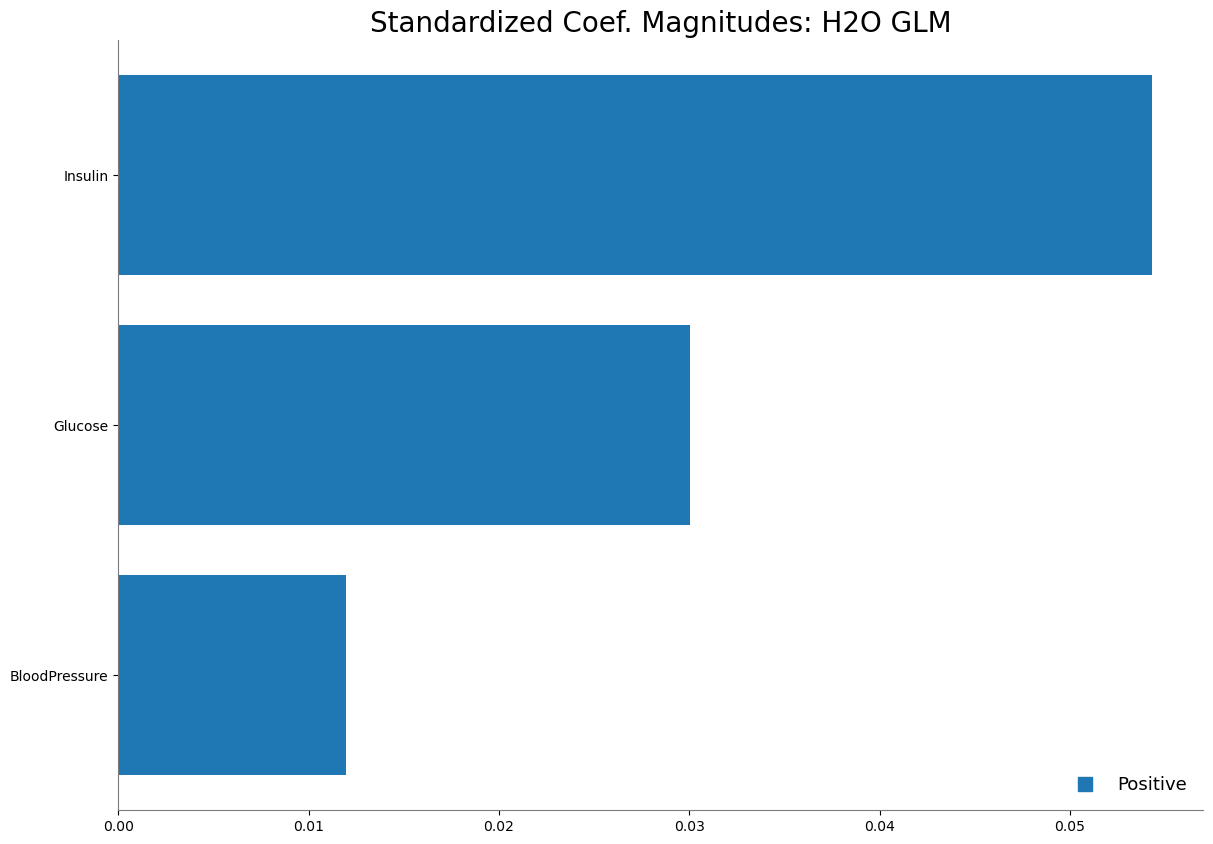

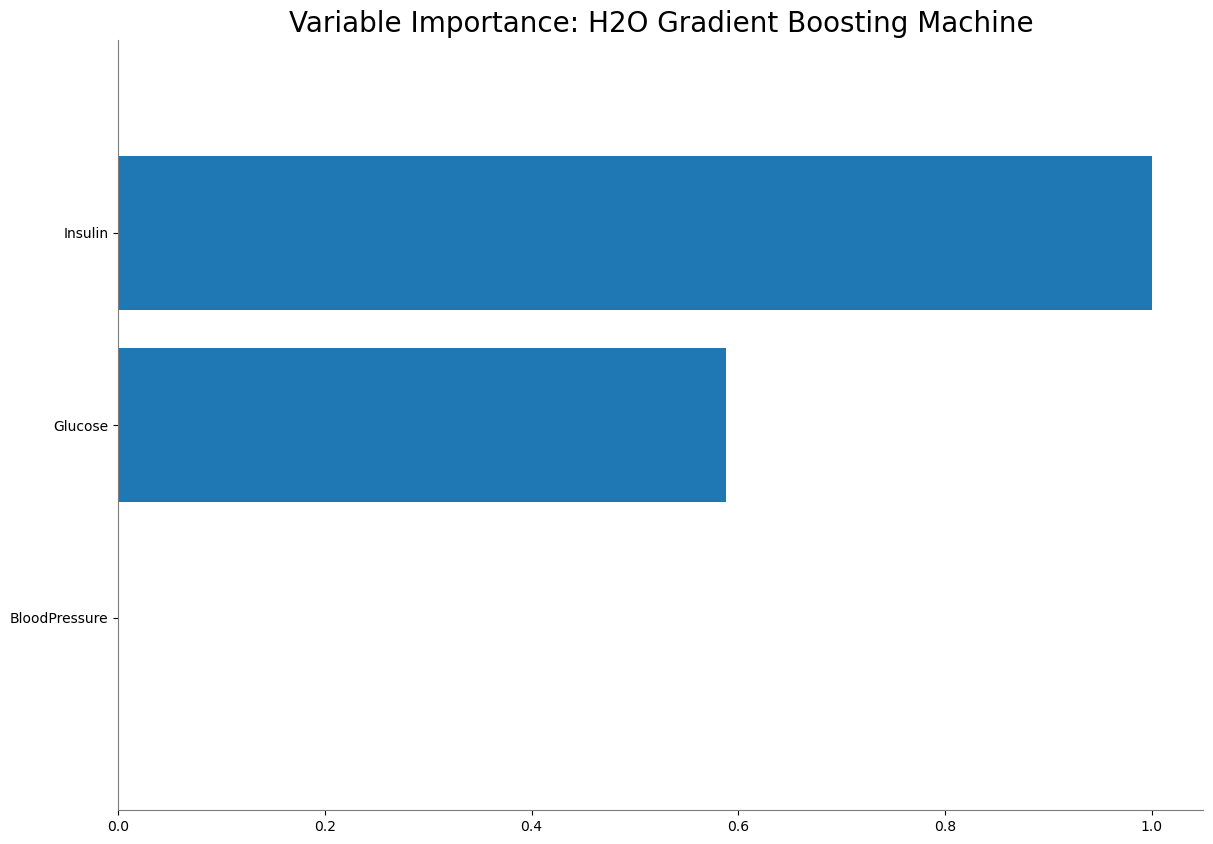

<Figure size 640x480 with 0 Axes>

In [25]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

a)data_glm.std_coef_plot():
This function is used to create a standardized coefficient plot for the GLM model. In this type of plot, the coefficients of the predictor variables in the GLM model are displayed, and they are standardized to have a mean of 0 and a standard deviation of 1. This standardization allows for a fair comparison of the magnitudes and directions of the coefficients. The plot typically shows each predictor variable on the x-axis and its corresponding standardized coefficient on the y-axis. The vertical bars represent the magnitude of the coefficients, and the bars' colors may indicate their direction (positive or negative impact on the response variable). This plot helps you understand the relative importance of each predictor in the GLM model.

b)data_gbm.varimp_plot():
This function generates a variable importance plot for the GBM model. In GBM, variable importance is usually calculated based on how often each predictor variable is used for splitting nodes in the ensemble of decision trees. The more a variable is used for splitting, the more important it is considered. The plot typically displays each predictor variable on the x-axis and its corresponding variable importance score on the y-axis. The bars or points represent the variable importances, and they are typically sorted in descending order. This plot is useful for identifying which predictors have the most influence in the GBM model.

In [26]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.11887336088924327
RMSE: 0.34478016313187637
MAE: 0.23557953364380493
RMSLE: 0.19651856427993775
Mean Residual Deviance: 0.11887336088924327

data_gbm.model_performance(test): This line of code calls the model_performance method on the data_gbm object, which represents your trained GBM model. The test argument specifies the dataset (in this case, the test dataset) on which you want to evaluate the model's performance.


In [27]:
data=data[["DiabetesPedigreeFunction","Glucose","BloodPressure"]]

# Pause.. it is important to check that output and understand it. Key is know your data best to validate the results

What you think was not normal in above plots ?? Insulin as standard deviation as 1 ?? How is that possible ?


so We dropped Insulin.....

NOW again repeat the same steps as performed above but this time it must be without insulin.

In [28]:
# Create a test/train split
#https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/splitting-datasets.html check h2o split frame syntax here 
train,test = data.split_frame([.9])

# train, test = data.split_frame([.9]): This line of code is splitting the dataset data into two parts:

train: This will be the training dataset, and it will contain approximately 90% (0.9) of the original data. The specific ratio of 0.9 indicates that 90% of the data will be used for training.

test: This will be the testing dataset, and it will contain the remaining approximately 10% (0.1) of the original data.

In [29]:
#  Set response variable and your choice of predictor variables
#myY target 
#myX features 
myY = "DiabetesPedigreeFunction"
myX = ["DiabetesPedigreeFunction","Glucose","BloodPressure"]

myY = "DiabetesPedigreeFunction": Here,  defining myY as the response variable. The response variable is the variable we are trying to predict in our modeling task. In this case, we are using "DiabetesPedigreeFunction" as the response variable. This variable is typically the target of the predictive model, and  will be trying to predict its values based on the predictor variables.

myX = ["DiabetesPedigreeFunction", "Glucose", "BloodPressure"]: This line defines myX as a list of predictor variables. Predictor variables are the features or attributes that uses to make predictions about the response variable. In this case, I have selected "DiabetesPedigreeFunction," "Glucose," and "BloodPressure" as the predictor variables. These are the attributes that  will use to make predictions about the values of the response variable.


In [30]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1697140933852_20


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 9.81E-5 )  2                             2                              1                       py_15_sid_9366

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.10670097498703922
RMSE: 0.3266511518226122
MAE: 0.2450556380086138
RMSLE: 0.19763789334655724
Mean Residual Deviance: 0.10670097498703922
R^2: 0.022721156537307774
Null degrees of freedom: 680
Residual degrees of freedom: 678
Null deviance: 74.35274430858773
Residual deviance: 72.6633639661737
AIC: 416.7035687553202

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.11406950524074394
RMSE: 0.3377417730171143
MAE: 0.2473506852387911
RMSLE: 0.19998896257130194
Mean Residual Deviance: 0.11406950524074394
R^2: -0.009743970116849798
Null degrees of freedom: 86
Residual degrees of freedom: 84
Null deviance: 9.849923607615338
Residual deviance: 9.924046955944723
AIC: 66.02288782608446

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2           validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  --------------------  ------------------  ---------------------  ------------------  ---------------------
    2023-10-13 17:22:50  0.000 sec   0             74.35274353597653          0.1091817085697159
    2023-10-13 17:22:50  0.005 sec   1                                                            0.3266511518226122  0.10670097498703922  0.2450556380086138  0.022721156537307774  0.3377417730171143  0.11406950524074394    0.2473506852387911  -0.009743970116849798

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Glucose        0.0475884              1                    0.848466
BloodPressure  0.00849919             0.178598             0.151534

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

(a)Creating the GLM Model:
1)data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True): You are creating an instance of the H2OGeneralizedLinearEstimator class, which is used to build GLM models. This line initializes the GLM model with the following settings:

family="gaussian": The family parameter specifies the distribution family for the GLM. In this case, you are using the "gaussian" family, which is appropriate for regression tasks with continuous numeric response variables.

standardize=True: This parameter specifies whether the predictor variables should be standardized. When set to True, it means that the model will standardize (mean-center and scale) the predictor variables. Standardization is often used to ensure that predictor variables are on the same scale, making it easier to compare their coefficients.

(b)Training the GLM Model:
1)data_glm.train(x=myX, y=myY, training_frame=train, validation_frame=test): This line of code trains the GLM model using the specified data:

2)x=myX: You specify the predictor variables defined in myX.
y=myY: You specify the response variable defined in myY.

3)training_frame=train: You use the train dataset as the training data for building the model. The train dataset typically contains a large portion of the data and is used for training the model.

4)validation_frame=test: The test dataset is used for model validation. It helps assess the model's performance on data that it hasn't seen during training, which is important for evaluating its generalization capability.


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

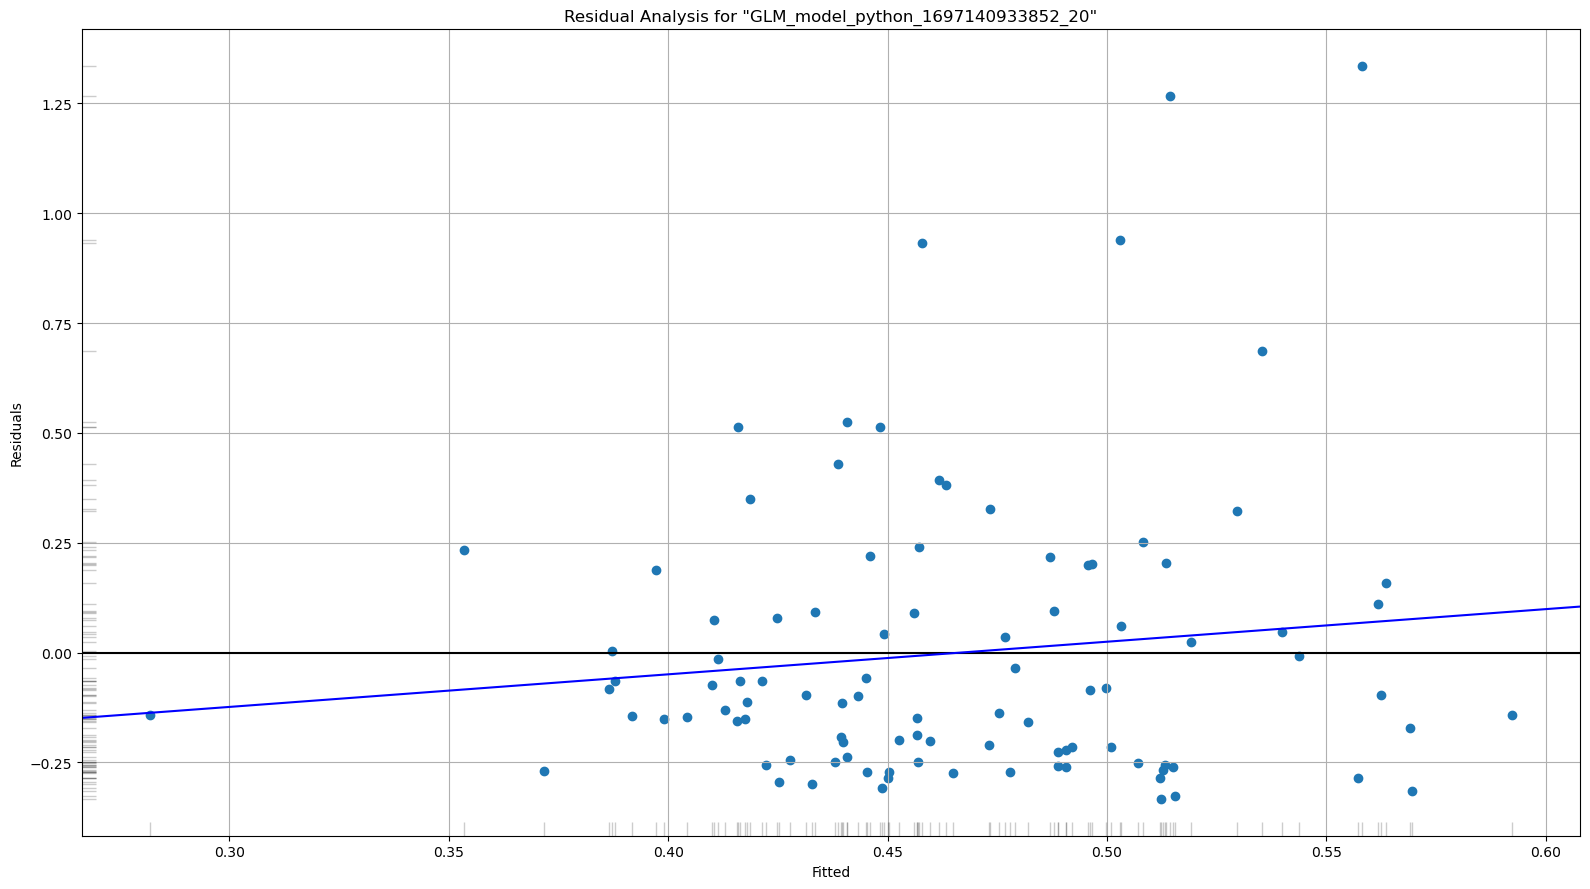

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

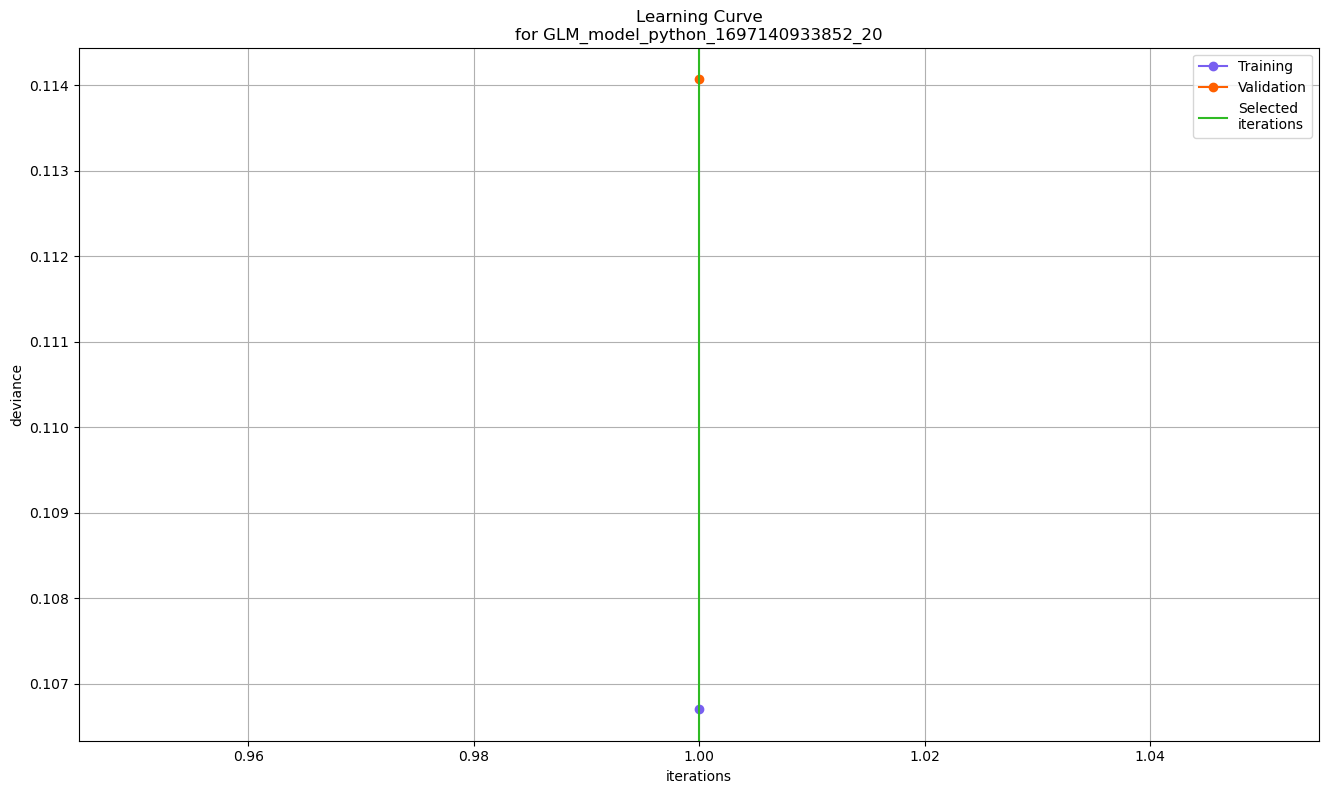

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

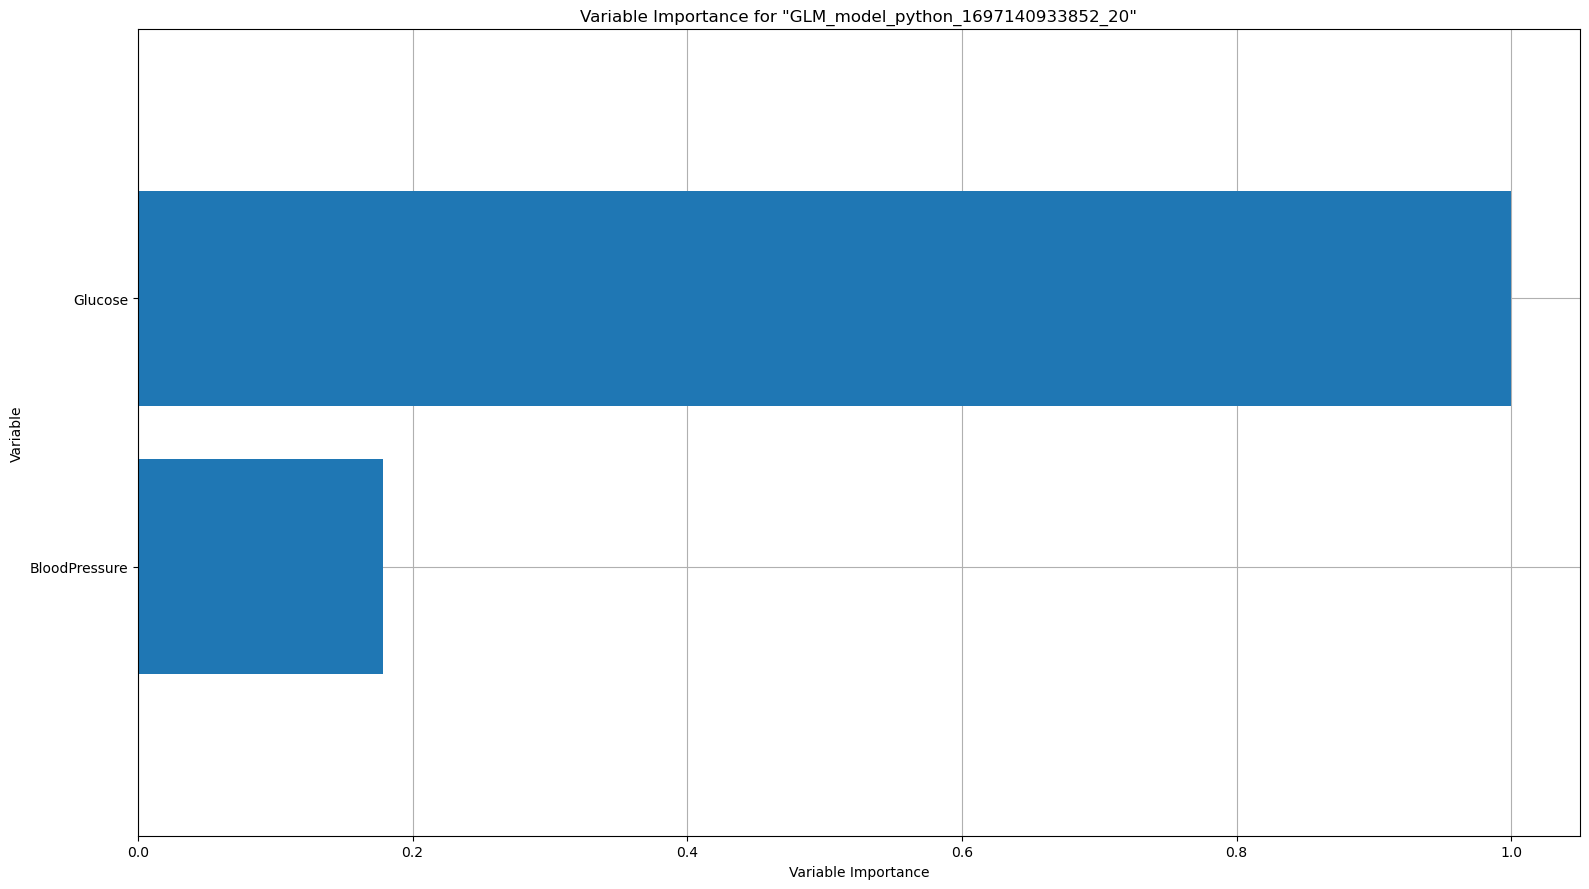

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

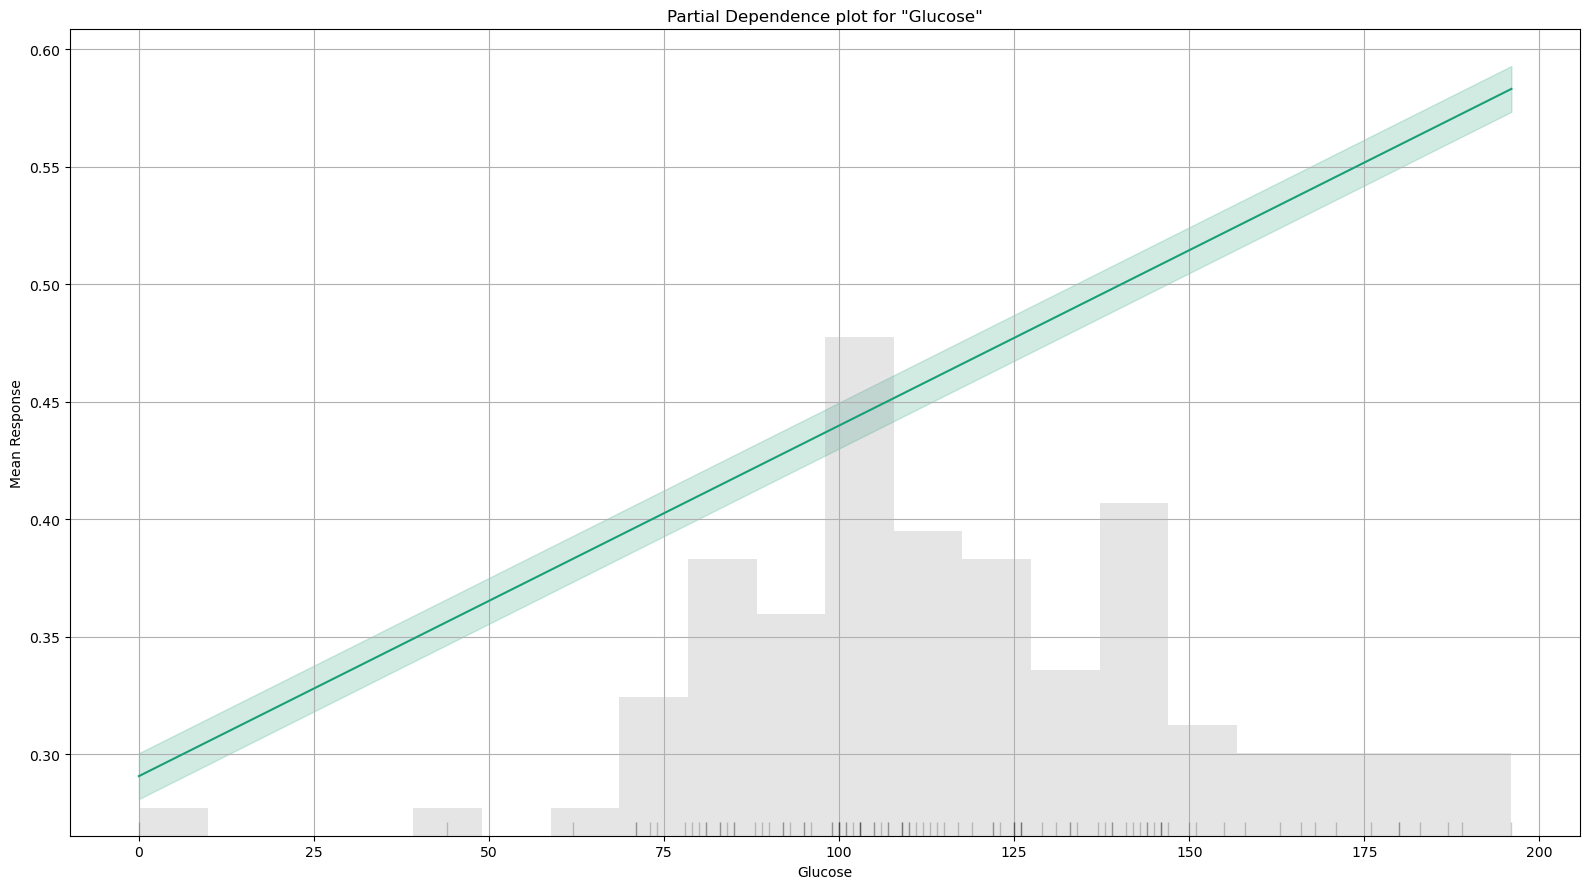

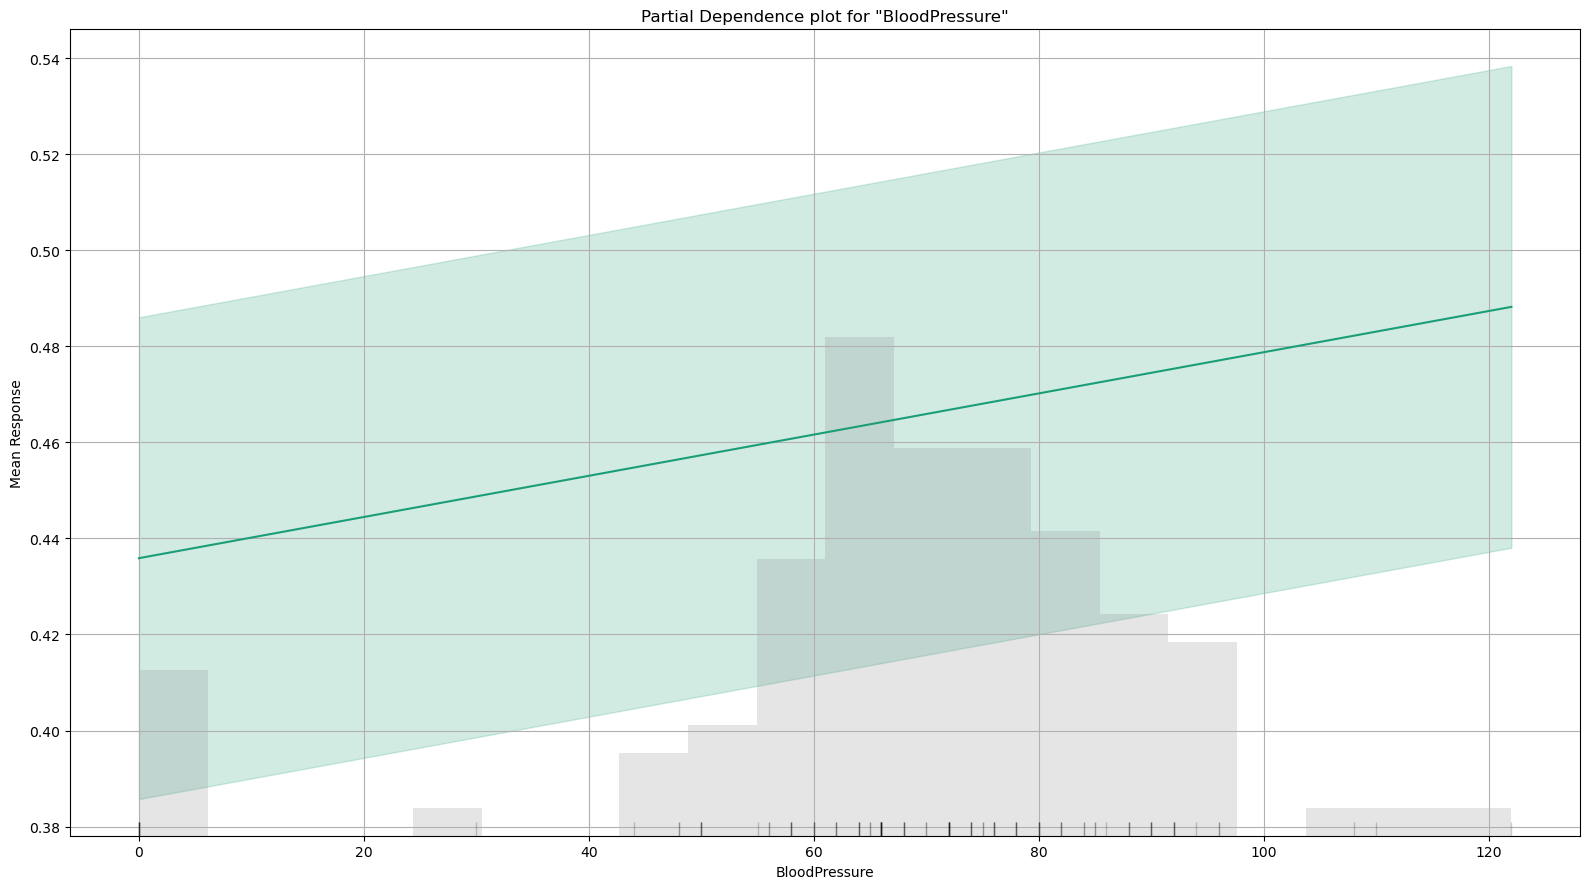

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

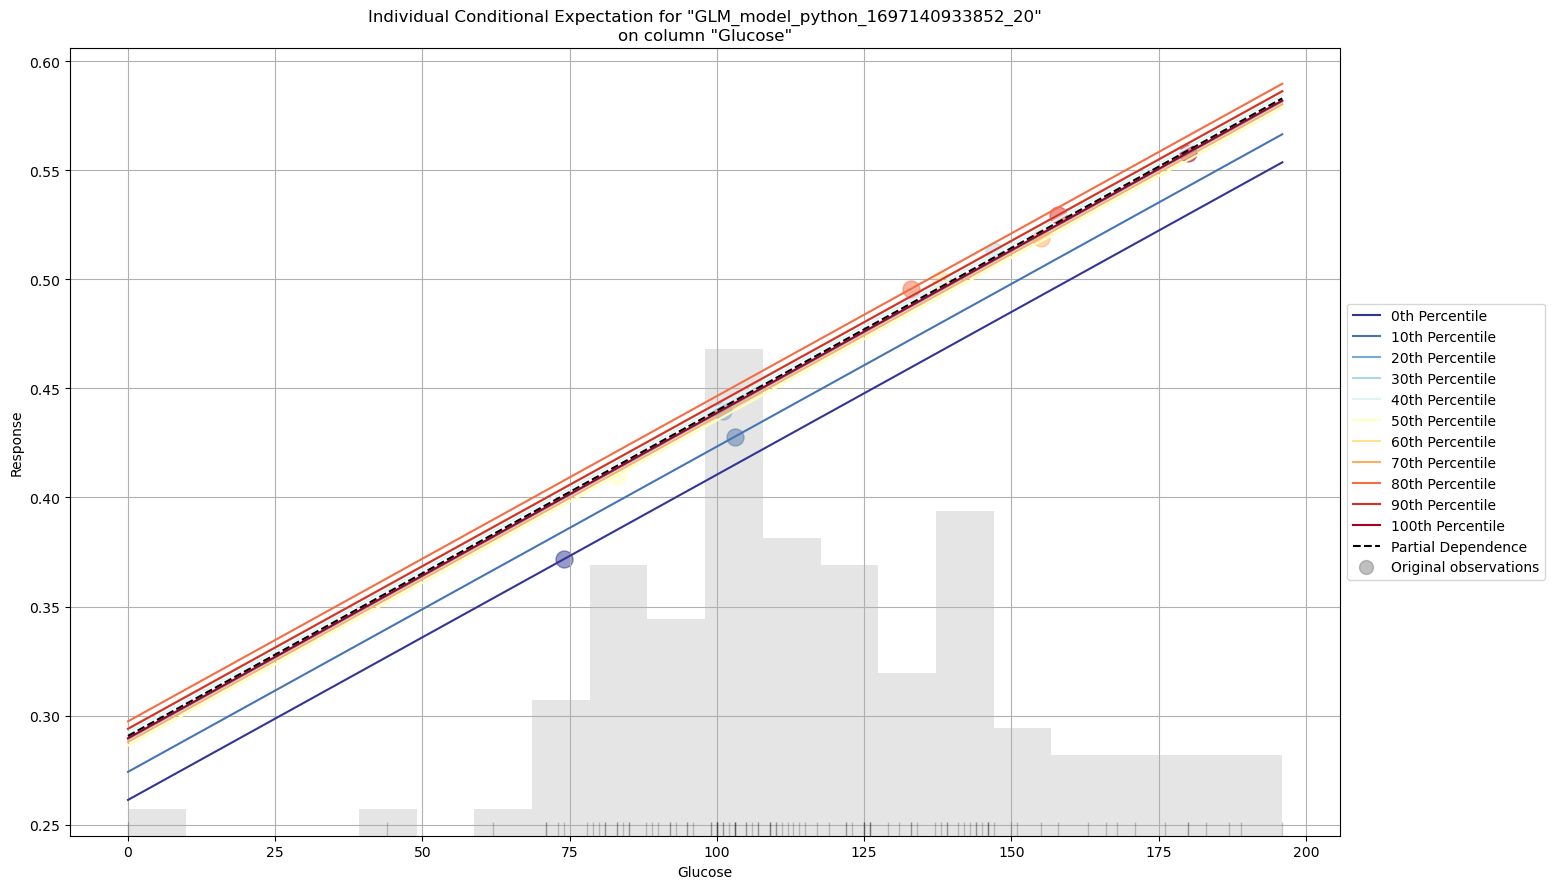

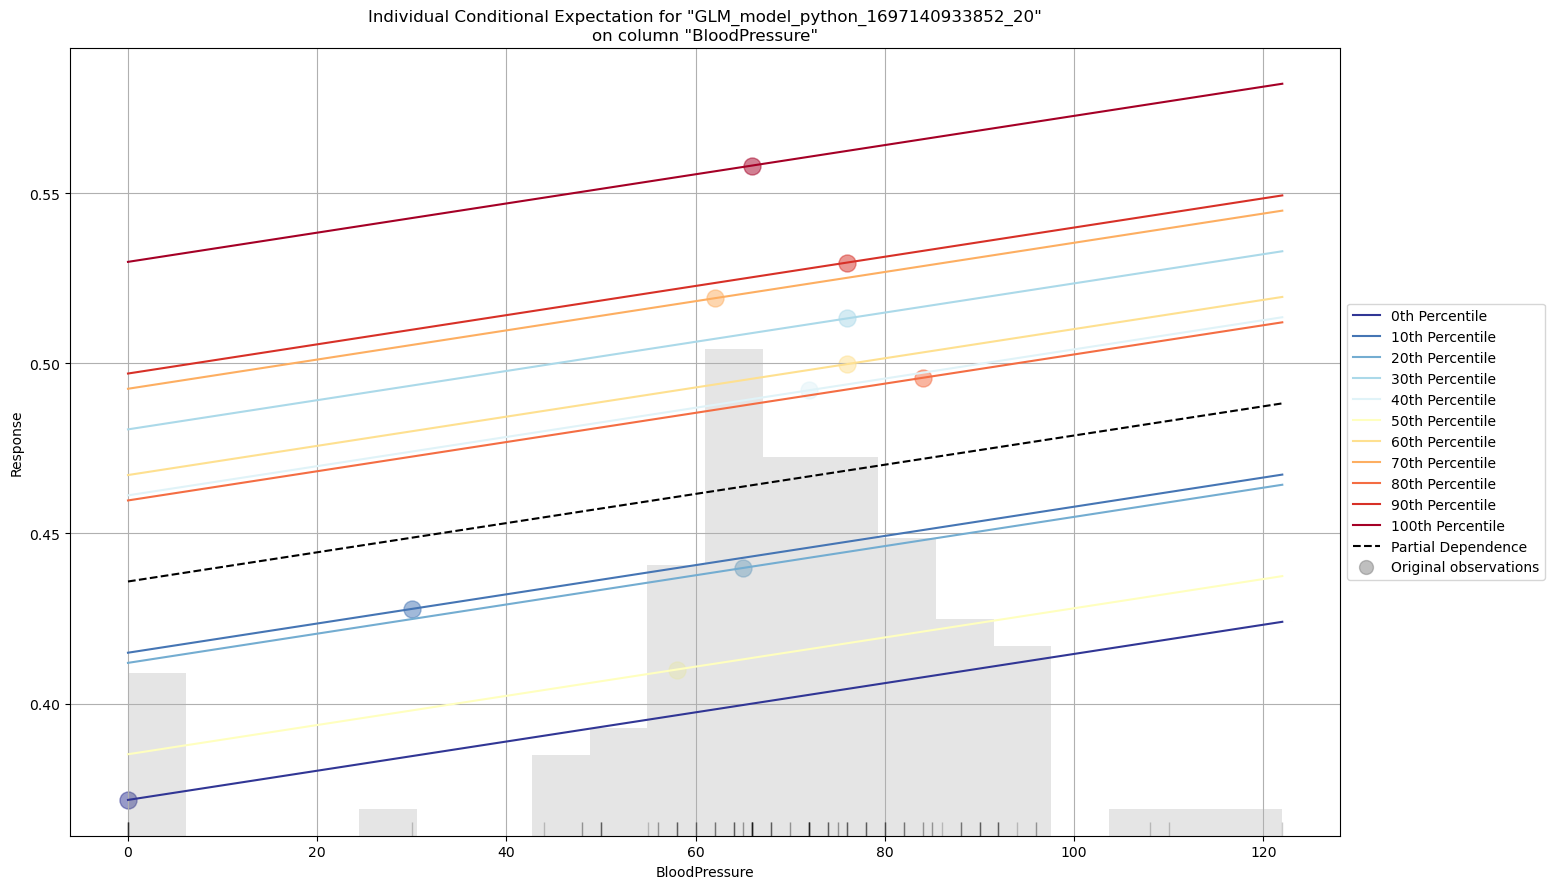

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [31]:
data_glm.explain(train[1:100,:])

The explanations generated by this method typically include details about how the model's coefficients (weights) for the predictor variables affect the predicted values. This can help to understand the relationship between the predictor variables and the response variable based on the specific data subset.

Keep in mind that model explanations can be valuable for model interpretation and understanding the drivers behind the model's predictions. It can provide insights into why the model is making certain predictions and how each predictor variable contributes to those predictions.

The specific content and format of the explanations may vary depending on the machine learning library or framework you are using. It's a valuable tool for understanding the inner workings of your GLM model.

In [32]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,829.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-10-13 17:24:32,0.003 sec,0.0,0.3304266,0.2472185,0.1091817,0.3364781,0.2444001,0.1132175
,2023-10-13 17:24:32,0.008 sec,1.0,0.3293290,0.2466470,0.1084576,0.3369334,0.2451705,0.1135241
,2023-10-13 17:24:32,0.011 sec,2.0,0.3284373,0.2461469,0.1078710,0.3374925,0.2460483,0.1139012
,2023-10-13 17:24:32,0.013 sec,3.0,0.3276151,0.2458455,0.1073316,0.3368758,0.2459965,0.1134853
,2023-10-13 17:24:32,0.015 sec,4.0,0.3269213,0.2455371,0.1068776,0.3372887,0.2464118,0.1137637
,2023-10-13 17:24:32,0.017 sec,5.0,0.3262864,0.2454511,0.1064628,0.3370840,0.2463664,0.1136256
,2023-10-13 17:24:32,0.018 sec,6.0,0.3257494,0.2451495,0.1061127,0.3378153,0.2470446,0.1141192
,2023-10-13 17:24:32,0.020 sec,7.0,0.3252584,0.2450759,0.1057931,0.3378918,0.2470047,0.1141708



(1)Creating the GBM Model:
a)data_gbm = H2OGradientBoostingEstimator(balance_classes=True, ntrees=10, max_depth=1, learn_rate=0.1, min_rows=2): You are creating an instance of the H2OGradientBoostingEstimator class, which is used to build GBM models. This line initializes the GBM model with the following settings:

balance_classes=True: This parameter is set to True, which balances the class distribution in the dataset. It's often used for classification tasks to ensure that the model doesn't favor the majority class.
ntrees=10: This parameter specifies the number of trees (base learners) in the ensemble. In this case, you are 
building a GBM model with 10 trees.
max_depth=1: This parameter sets the maximum depth of the individual trees. A max_depth of 1 indicates that the trees are shallow and have a single split.
learn_rate=0.1: The learning rate controls the step size at each iteration when building the ensemble. A value of 0.1 is set here.

min_rows=2: This parameter defines the minimum number of observations (rows) required to create a node in a tree.
Training the GBM Model:

data_gbm.train(x=myX, y=myY, training_frame=train, validation_frame=test): This line of code trains the GBM model using the specified data and parameters:

x=myX: You specify the predictor variables defined in myX.
y=myY: You specify the response variable defined in myY.
training_frame=train: The train dataset is used as the training data for building the model. The train dataset is typically a large portion of the data and is used for training the model.
validation_frame=test: The test dataset is used for model validation. It helps assess the model's performance on data that it hasn't seen during training, which is essential for evaluating its generalization capability.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

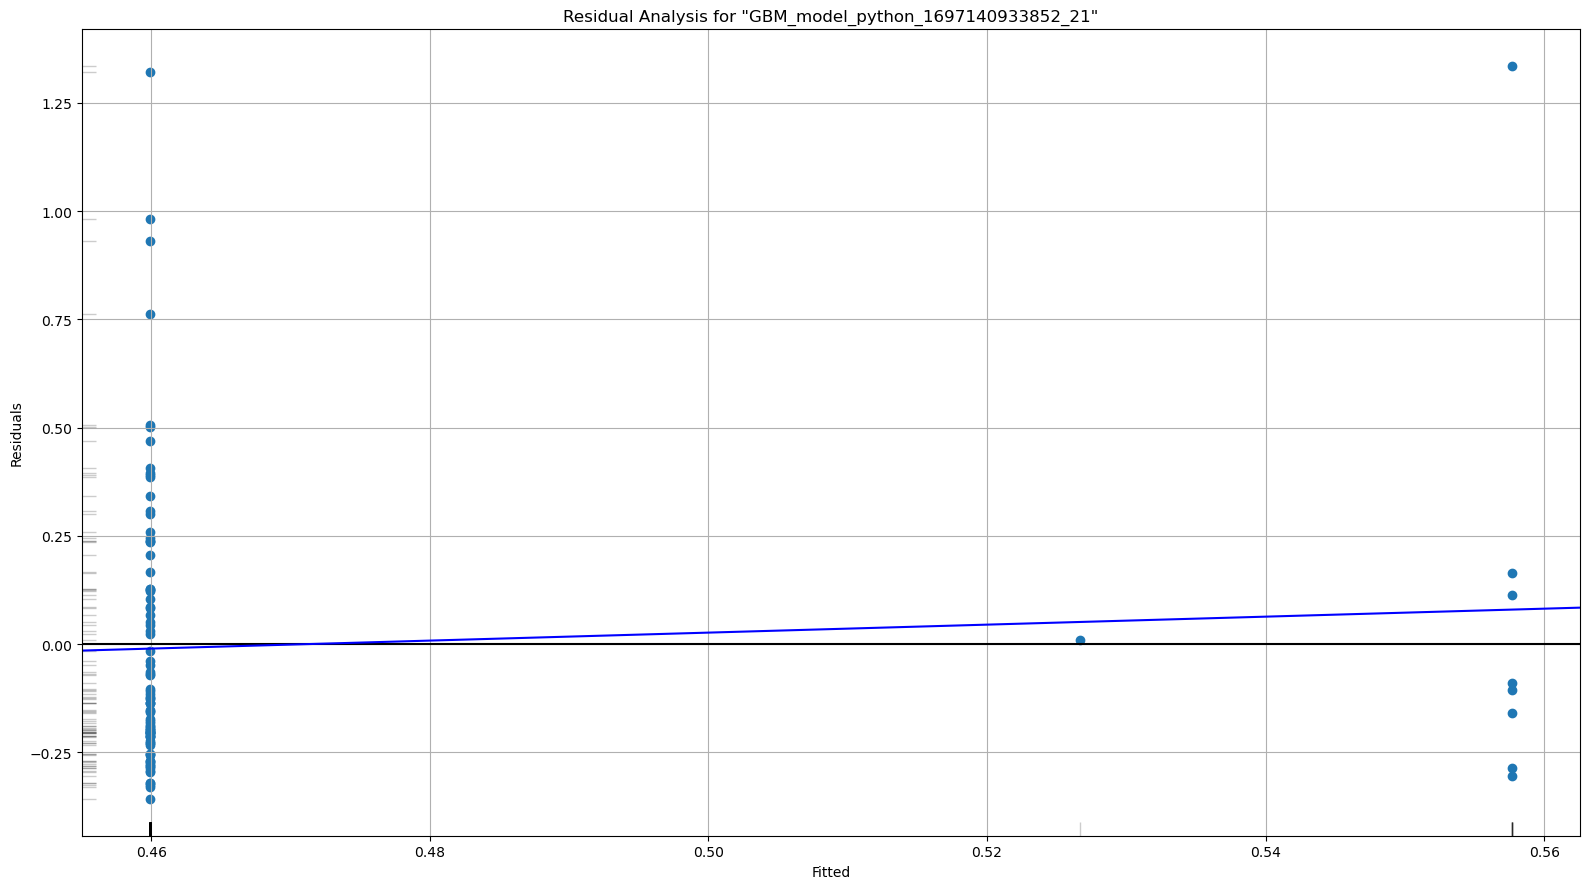

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

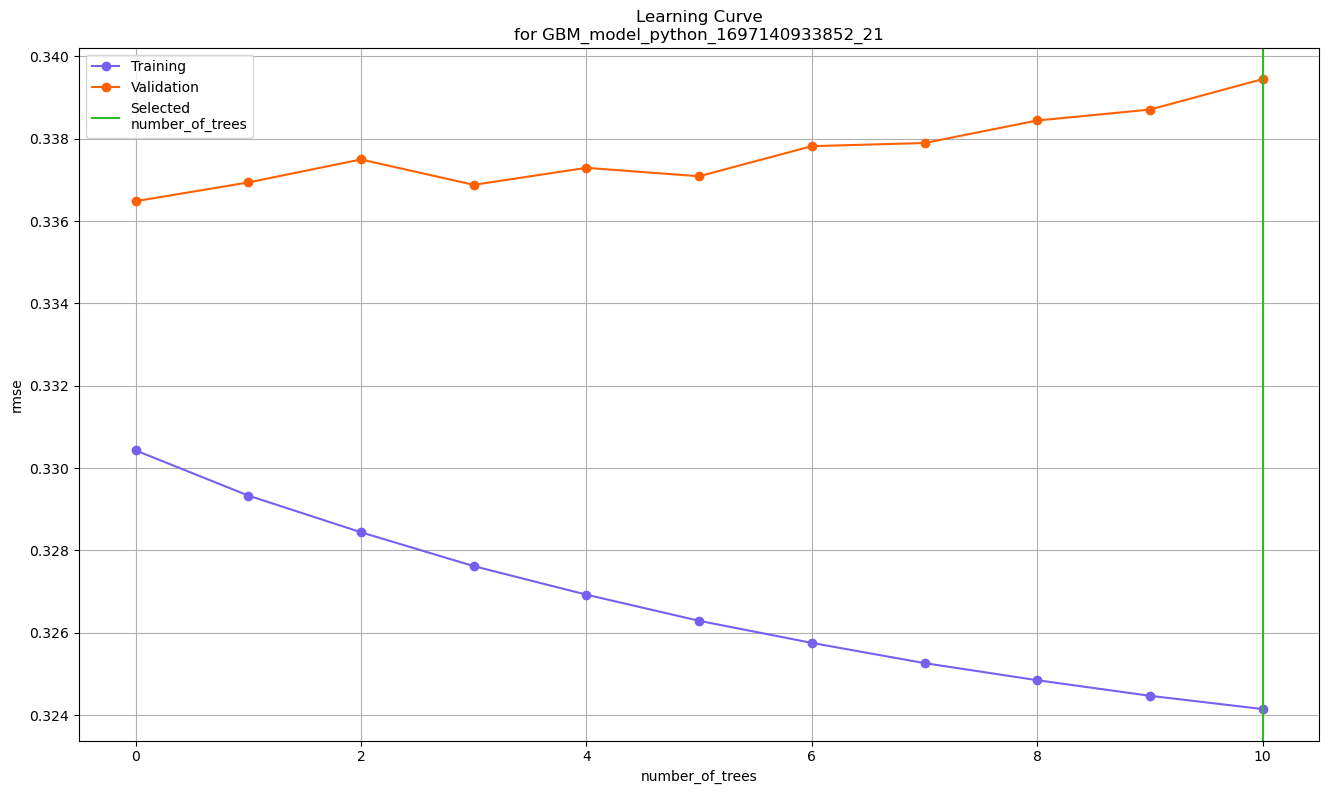

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

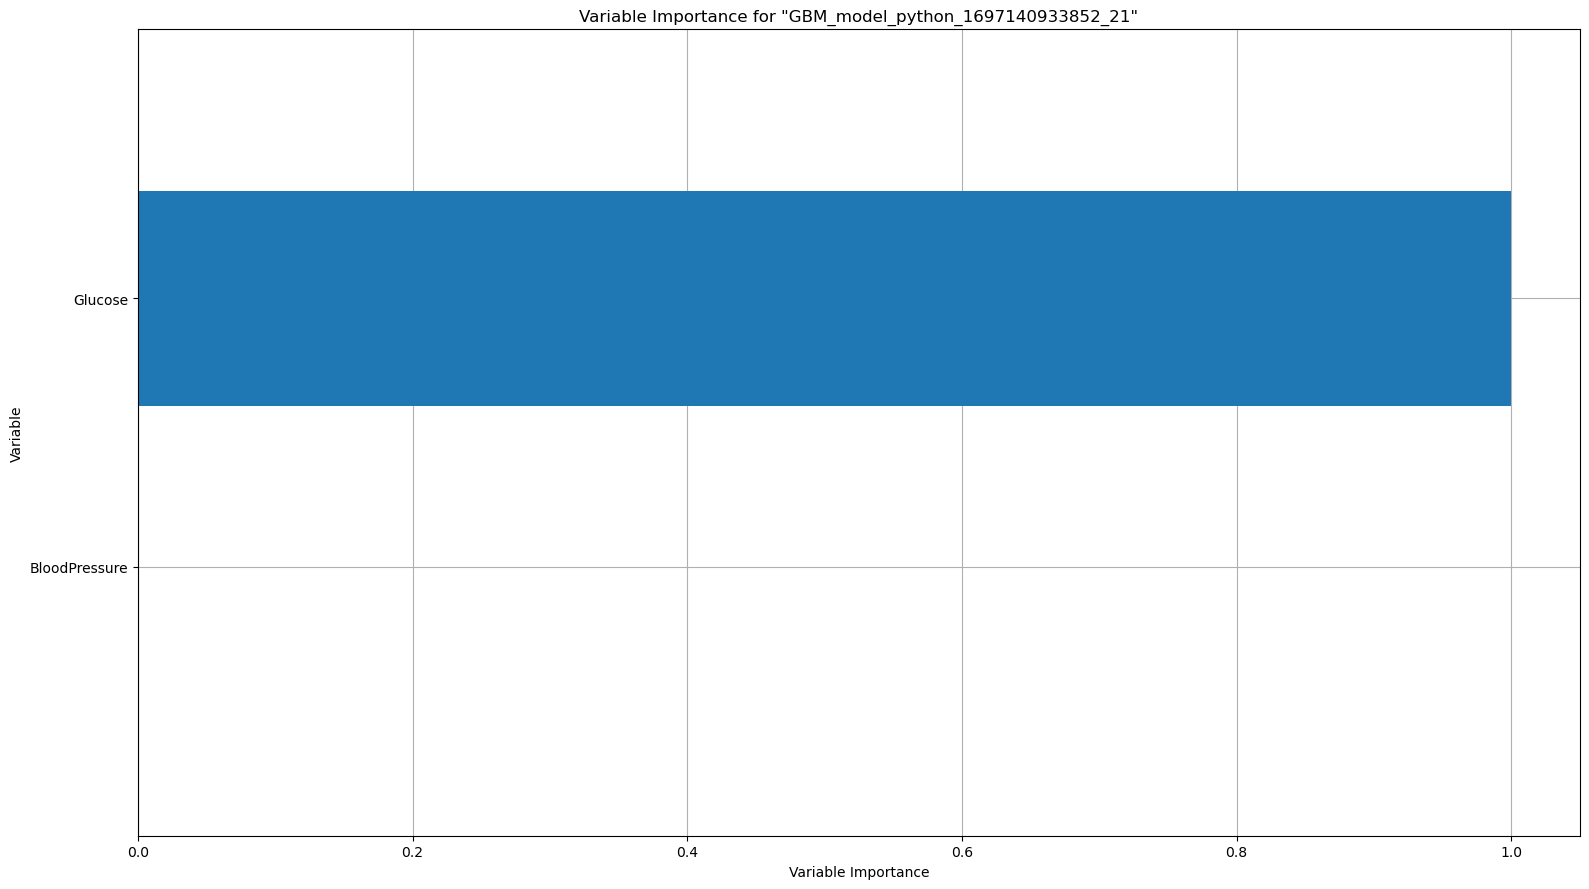

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

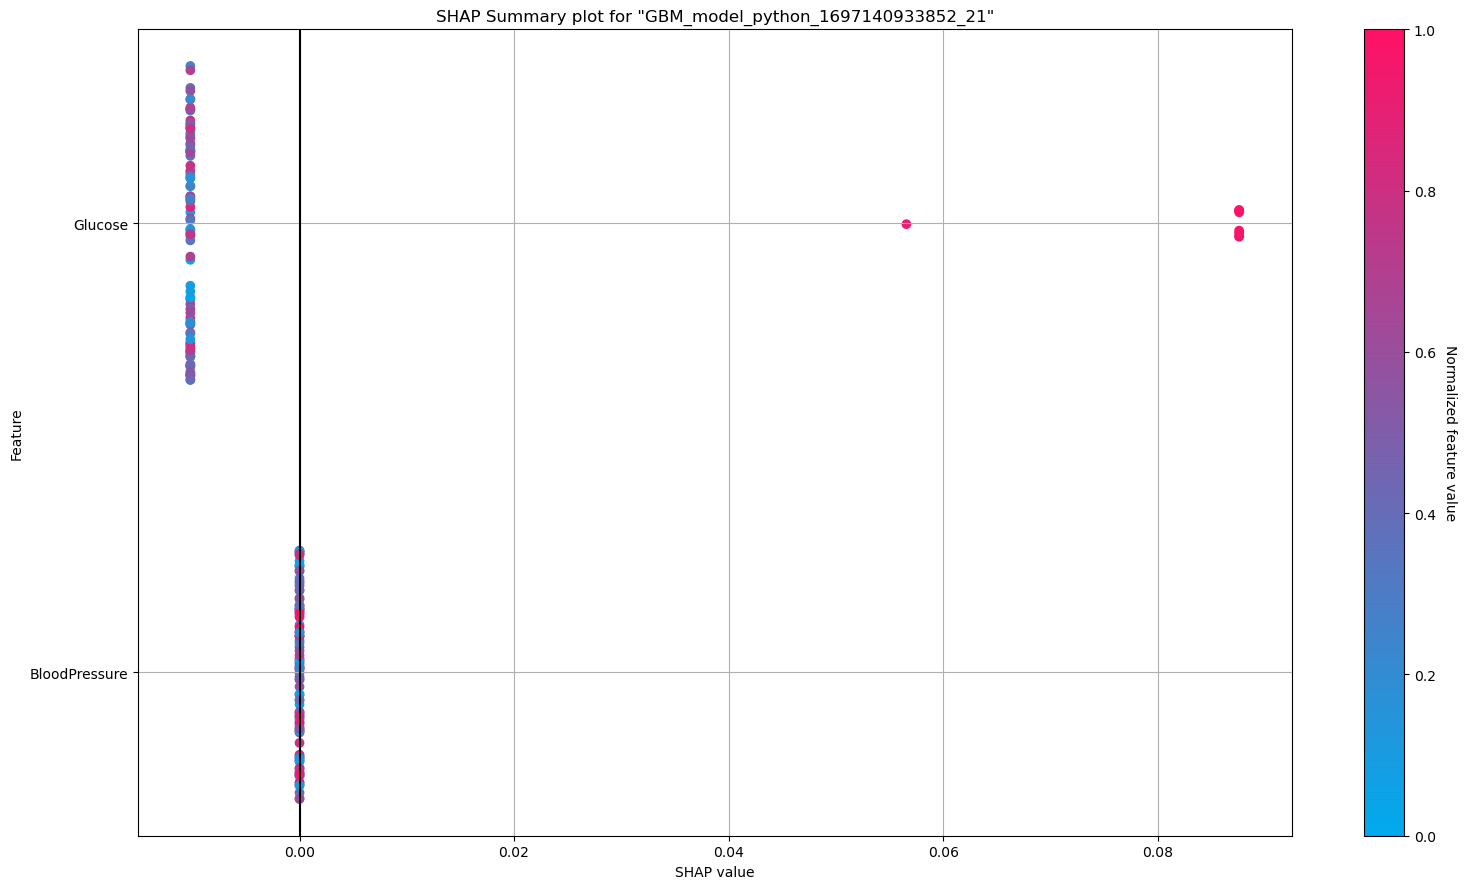

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

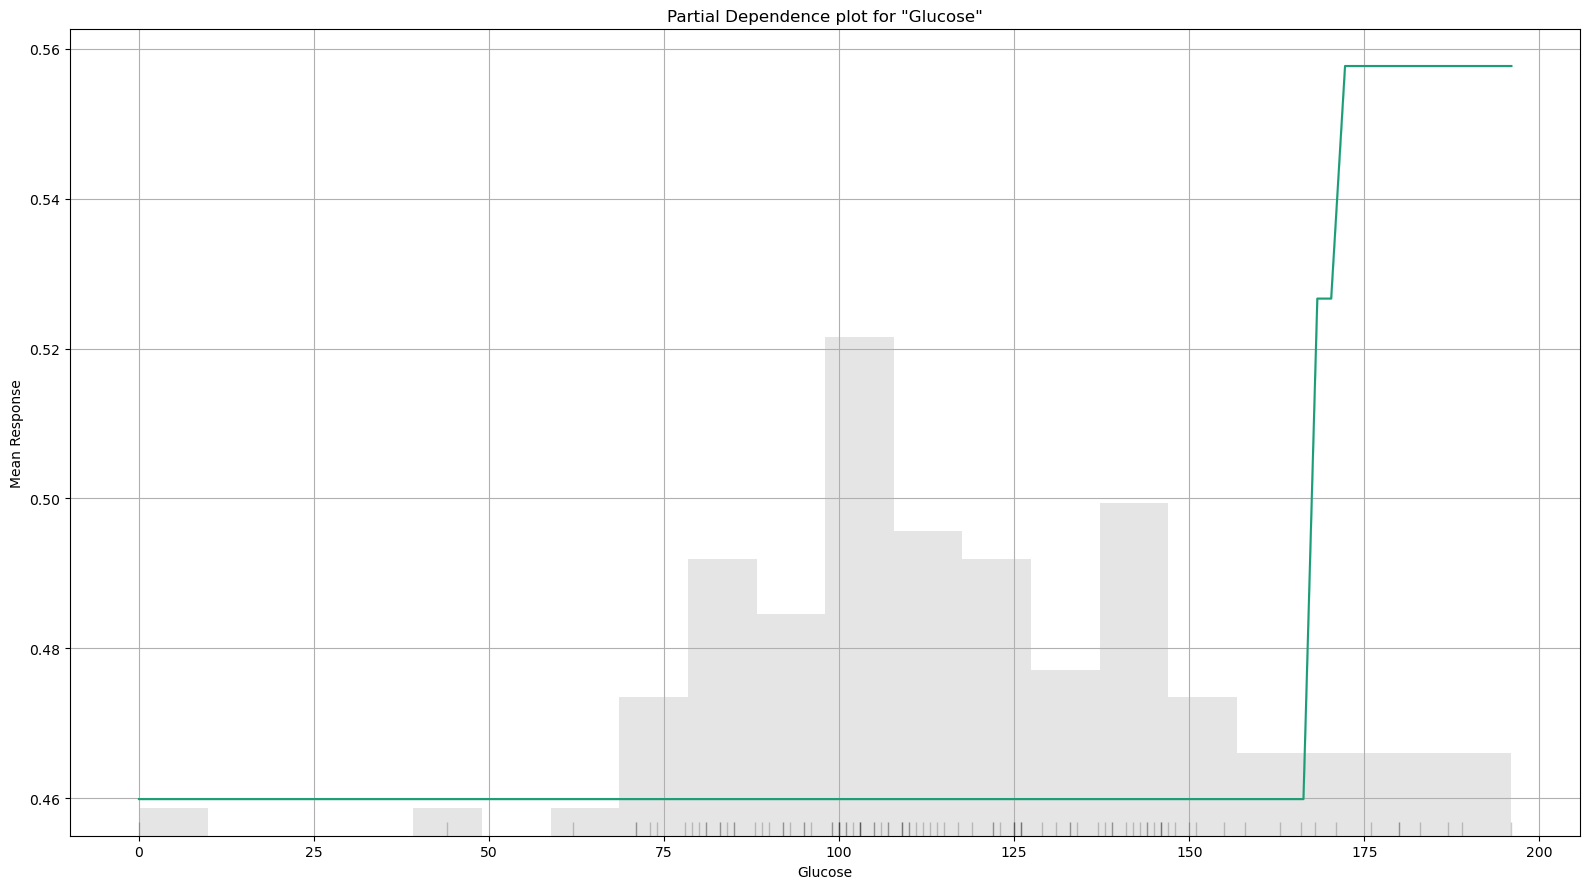

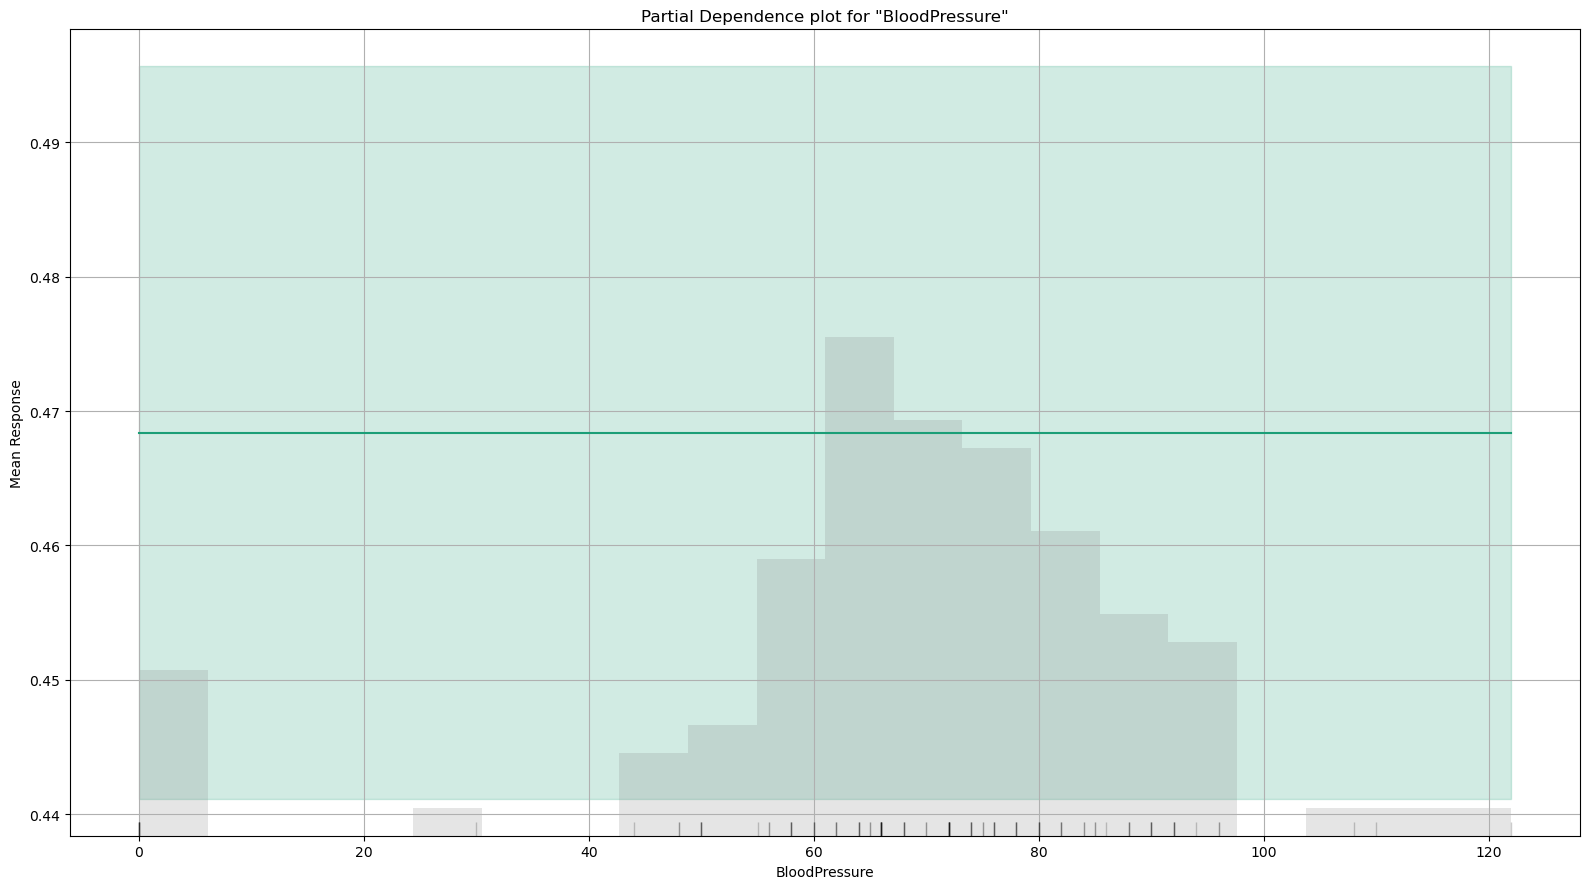

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

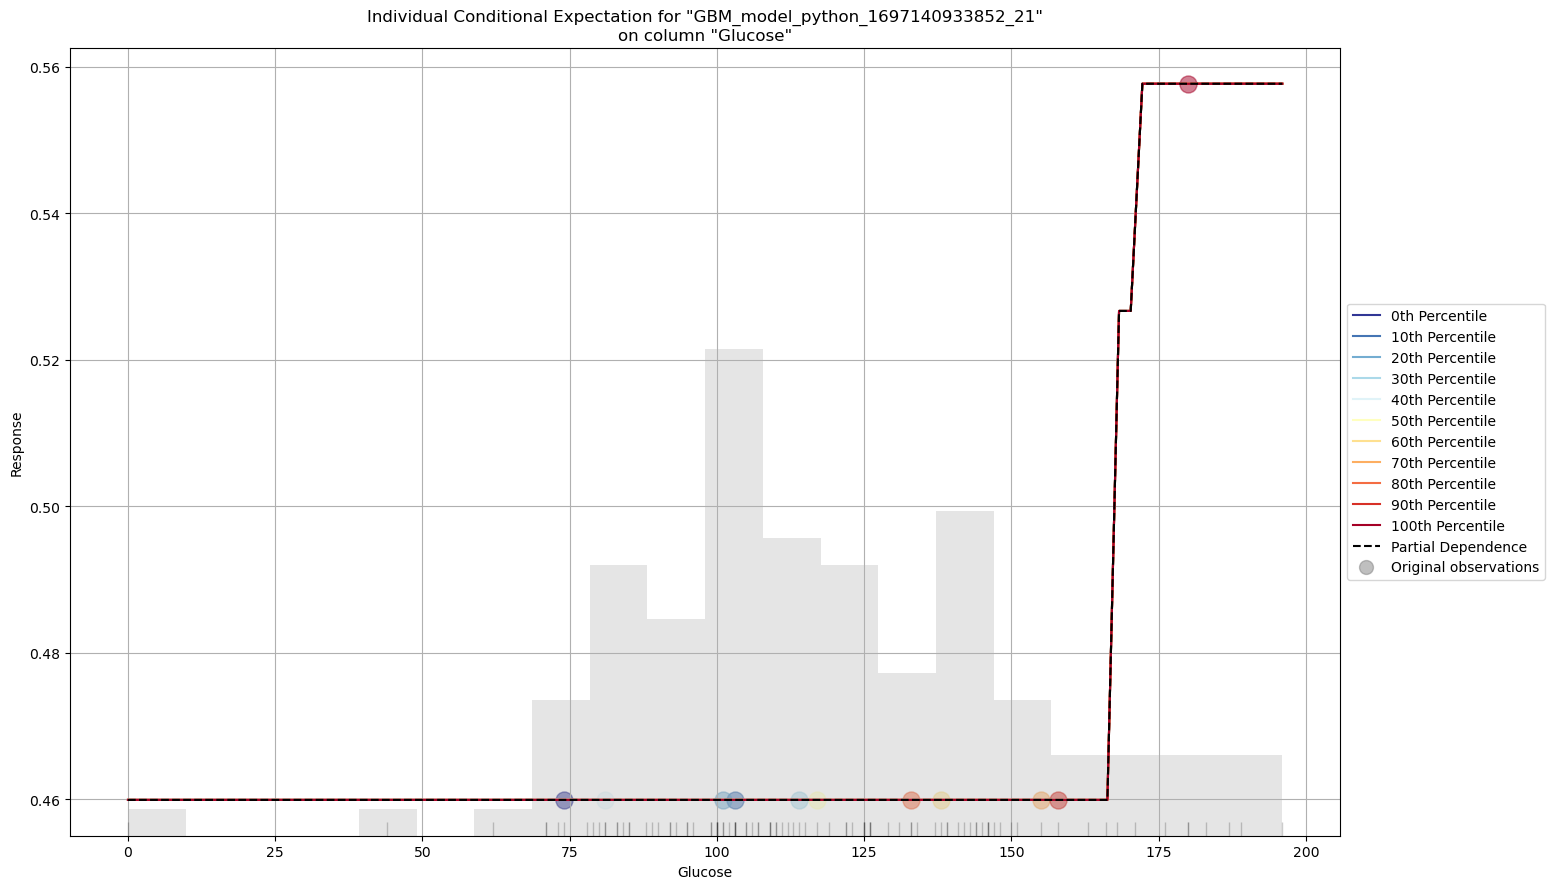

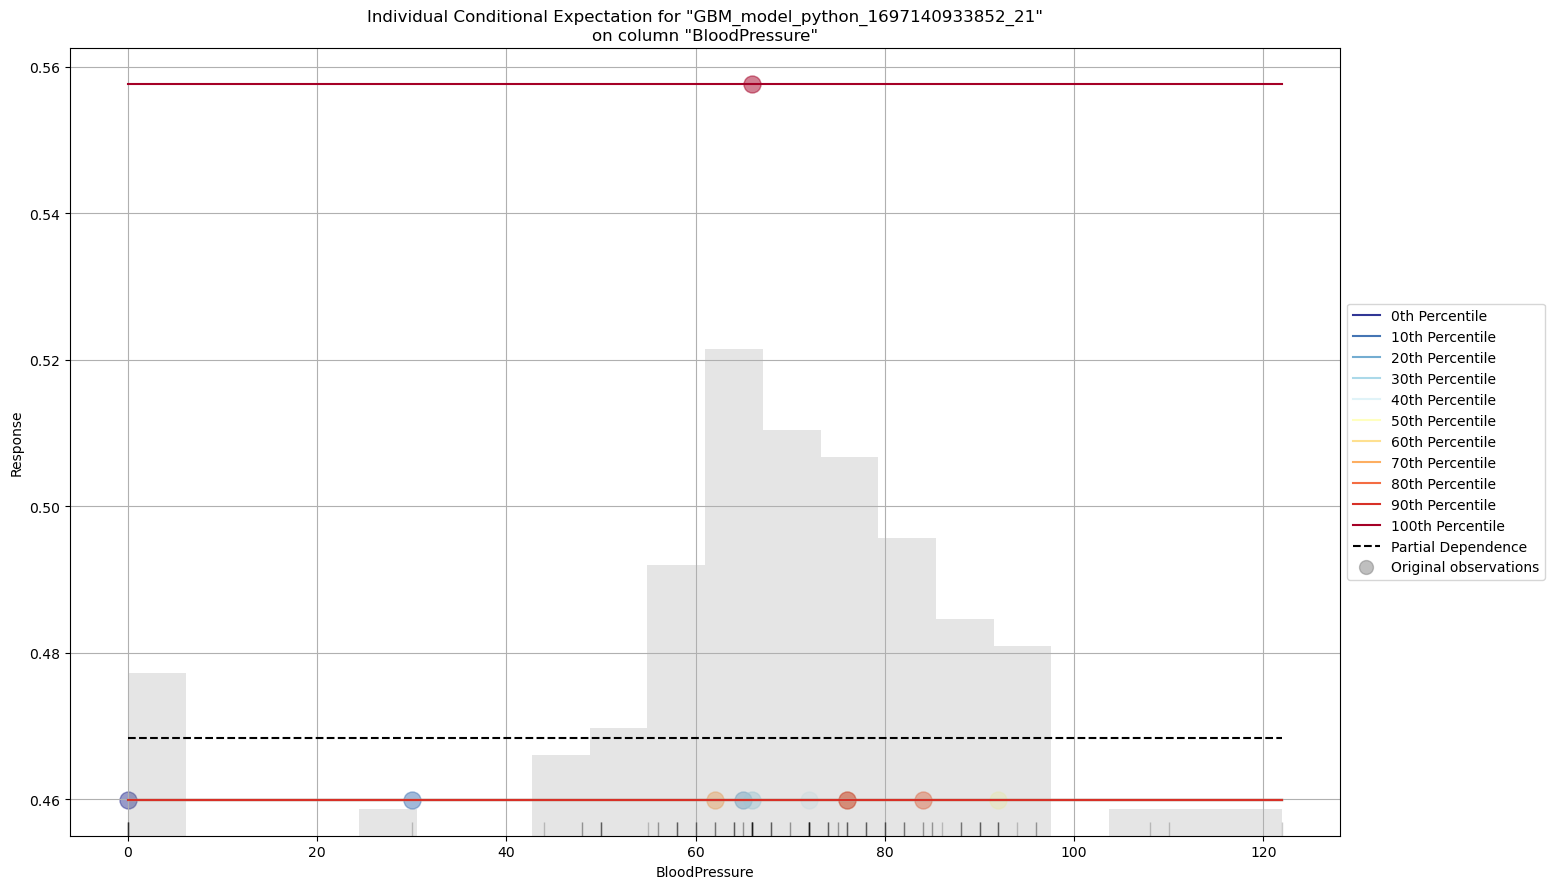

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [33]:
data_gbm.explain(train[0:100,:])

The data_gbm.explain(train[0:100,:]) code is used to generate explanations for the Gradient Boosting Machine (GBM) model using a subset of the training data. Let's break down what this code does:

data_gbm: This is the GBM model that you previously trained.
.explain(train[0:100,:]): This method is used to explain or provide insights into how the GBM model makes predictions based on a specific dataset. In this case, you are providing it with a subset of the training data, specifically the first 100 rows (observations), denoted as train[0:100, :]. This subset is used to generate explanations for a limited set of data points.

In [34]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor     |   Normalized Coefficient |
|---------------+--------------------------|
| Intercept     |               0.47009    |
| Glucose       |               0.0475884  |
| BloodPressure |               0.00849919 |


# Let's break down what this code does:

1)Calculating Variable Importances for GLM:
glm_varimp = data_glm.coef_norm(): This line of code calculates the normalized coefficients for the GLM model. The coef_norm method returns a dictionary where the keys are the predictor variables, and the values are the normalized coefficients. These coefficients indicate the impact of each predictor variable on the response variable.

2)Calculating the Magnitude of Coefficients:
for k, v in iteritems(glm_varimp): glm_varimp[k] = abs(glm_varimp[k]): This loop iterates through the dictionary of normalized coefficients (glm_varimp) and calculates the absolute (magnitude) value of each coefficient. This step ensures that both positive and negative coefficients are considered when measuring variable importance.
Sorting the Coefficients:

3)glm_sorted = sorted(glm_varimp.items(), key=operator.itemgetter(1), reverse=True): After calculating the magnitudes of the coefficients, this line of code sorts the coefficients in descending order based on their magnitude. This sorting allows you to identify the most important predictor variables, with the largest magnitudes, first.

4)Displaying Variable Importances:
table = tabulate(glm_sorted, headers=["Predictor", "Normalized Coefficient"], tablefmt="orgtbl"): The code uses the tabulate function to format and display the sorted coefficients in a tabular format. The table includes two columns: "Predictor" (the name of the predictor variable) and "Normalized Coefficient" (the magnitude of the coefficient). This table provides a clear view of the variable importances.

5)Printing the Variable Importances:
print("Variable Importances:\n\n" + table): This line prints the table of variable importances to the console, making it visible for analysis.


In [35]:
data_glm.varimp()

[('Glucose', 0.04758843779563904, 1.0, 0.8484658083414293),
 ('BloodPressure',
  0.00849919393658638,
  0.17859787650699555,
  0.15153419165857074)]

# Here's a breakdown of what the function does:

1-Obtaining Variable Importances:
data_glm.varimp(): This function call calculates and returns the variable importances for the GLM model stored in the data_glm object.

2-Variable Importance Information:
The function returns a list of dictionaries, where each dictionary contains the following information for a predictor variable:
a)"variable": The name of the predictor variable.
b)"relative_importance": The relative importance score, indicating the impact of the variable on the model's predictions.
c)"scaled_importance": The scaled importance score, which is the relative importance normalized to sum to 1. This provides a relative ranking of variable importance.


In [36]:
#importance of variables (predictor variables)
data_gbm.varimp()

[('Glucose', 14.743361473083496, 1.0, 1.0), ('BloodPressure', 0.0, 0.0, 0.0)]

The data_gbm.varimp() function is used to obtain the variable importances from a Gradient Boosting Machine (GBM) model in H2O. Variable importances provide information about the impact of each predictor variable on the model's predictions. This function returns a list of dictionaries, where each dictionary contains information about a predictor variable and its importance.

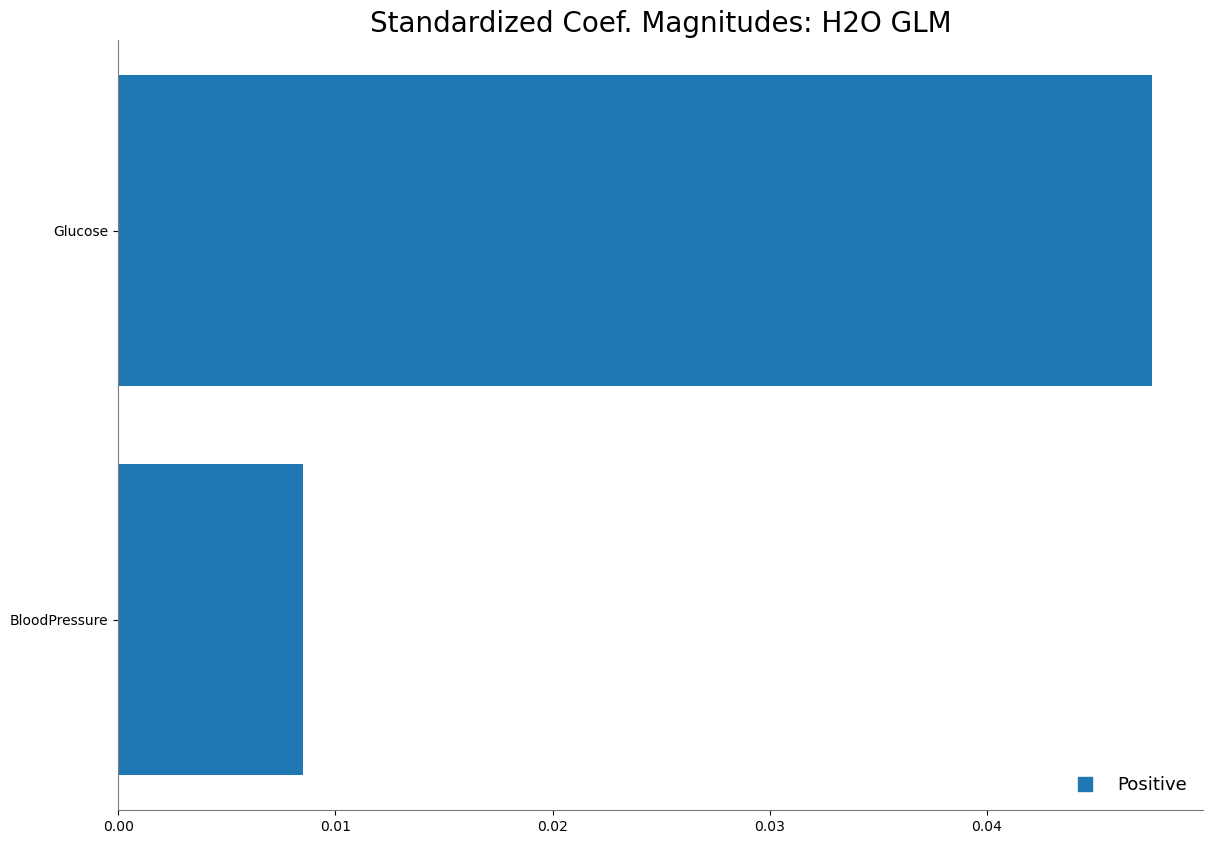

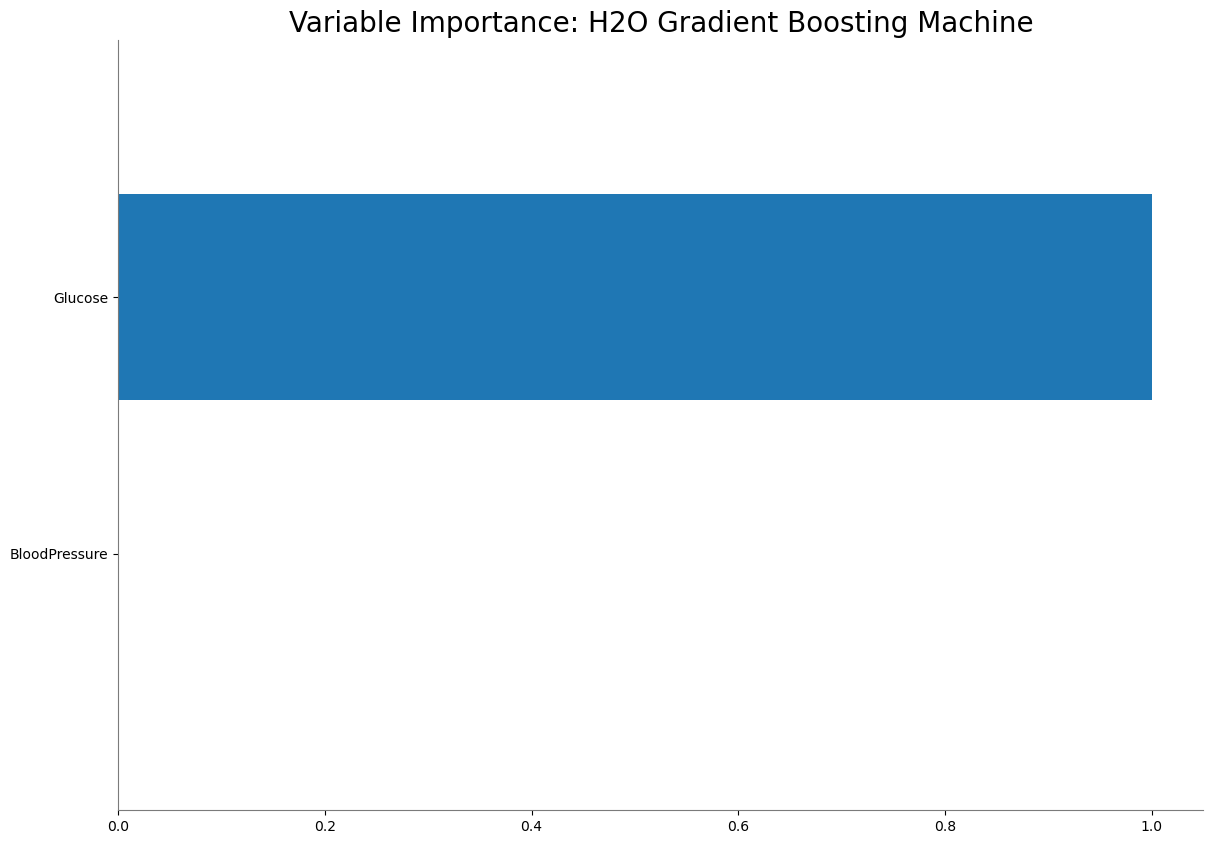

<Figure size 640x480 with 0 Axes>

In [37]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

# The code you provided consists of two commands related to the visualization of model information:

a)data_glm.std_coef_plot(): This command is used to create a standard coefficient plot for the Generalized Linear Model (GLM) represented by the data_glm object. The standard coefficient plot visualizes the standardized coefficients for each predictor variable in the GLM. It allows to assess the importance and direction (positive or negative) of each predictor variable's impact on the response variable.

b)data_gbm.varimp_plot(): This command is used to create a variable importance plot for the Gradient Boosting Machine (GBM) model represented by the data_gbm object. The variable importance plot displays the relative importance of each predictor variable in the GBM model. It helps you identify which predictor variables have the most significant impact on the model's predictions.

In [38]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.11522245761964654
RMSE: 0.33944433655556333
MAE: 0.24781409185969866
RMSLE: 0.20091879670381646
Mean Residual Deviance: 0.11522245761964654

# data_gbm.model_performance(test), it generates a set of performance metrics and statistics based on how well the model's predictions match the actual values in the test dataset.

In [39]:
#check the model performance of glm test dataset
data_glm.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.11406950524074394
RMSE: 0.3377417730171143
MAE: 0.2473506852387911
RMSLE: 0.19998896257130194
Mean Residual Deviance: 0.11406950524074394
R^2: -0.009743970116849798
Null degrees of freedom: 86
Residual degrees of freedom: 84
Null deviance: 9.849923607615338
Residual deviance: 9.924046955944723
AIC: 66.02288782608446

# Here's what this code does:

data_glm: This is the GLM model that you previously trained.

model_performance(test): This method is used to generate a set of performance metrics and statistics based on how well the GLM model's predictions match the actual values in the test dataset. The test dataset is typically a subset of the data that the model has not seen during training, and it is used to assess the model's generalization performance.

In [40]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ and name !='DiabetesPedigreeFunction']
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:

            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

The get_independent_variables function appears to be a custom function that is designed to extract the independent variables (predictor variables) from a dataset, excluding the response variable (targ) and a specific variable named 'DiabetesPedigreeFunction'. 

In [41]:
#getting dependent and independent variables
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['Glucose', 'BloodPressure']
DiabetesPedigreeFunction


The purpose of this code is to extract the independent variables from the train dataset and store their names in the X variable. It is a common step in preparing data for machine learning, as we need to specify which variables will be used as predictors (independent variables) and which one will be the target (response variable).

In [42]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

# Here's what the code does:

run_time=333: This line defines the maximum runtime in seconds for the AutoML experiment. The variable run_time is set to 333 seconds, which means that the AutoML experiment will run for a maximum of 333 seconds (approximately 5 minutes and 33 seconds).

aml = H2OAutoML(max_runtime_secs=run_time): This line initializes an AutoML object named aml. We are using the H2OAutoML class from the H2O library. The max_runtime_secs parameter is set to the value of the run_time variable, which specifies the maximum runtime for the AutoML experiment.

In [43]:
model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

AutoML progress: |
17:32:18.228: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20231013_173218_model_5


Status of Neuron Layers: predicting DiabetesPedigreeFunction, regression, gaussian distribution, Quadratic loss, 201 weights/biases, 5.9 KB, 6,816,810 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        2        Input             20.0
    2        50       RectifierDropout  20.0       0.0   0.0   0.0005319290113402531  0.0007548651192337275  0.0         0.004094108750578016  0.257676362991333    0.05272053915540249  0.2162979245185852
    3        1        Linear                       0.0   0.0   0.0008873937999305781  0.0028017647564411163  0.0         -0.15028918547555803  0.38645875453948975  0.12829630725799368  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.10451986585656298
RMSE: 0.323295322973536
MAE: 0.23951652183284453
RMSLE: 0.19465989694185062
Mean Residual Deviance: 0.10451986585656298

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.10634969249886331
RMSE: 0.32611300571866697
MAE: 0.24349020081136333
RMSLE: 0.19686891280908114
Mean Residual Deviance: 0.10634969249886331

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.243504   0.013179    0.234376      0.260087      0.226799      0.245423      0.250832
mean_residual_deviance  0.106364   0.0118843   0.0967764     0.125434      0.105831      0.0960143     0.107764
mse                     0.106364   0.0118843   0.0967764     0.125434      0.105831      0.0960143     0.107764
r2                      0.0197651  0.0196915   0.0421831     0.0292127     0.0289507     -0.00477433   0.00325311
residual_deviance       0.106364   0.0118843   0.0967764     0.125434      0.105831      0.0960143     0.107764
rmse                    0.325741   0.0178987   0.311089      0.354167      0.325316      0.309862      0.328274
rmsle                   0.196797   0.00634834  0.189712      0.205428      0.191998      0.196402      0.200447

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-10-13 17:33:58  0.000 sec                           0         0             0            nan              nan                  nan             nan
    2023-10-13 17:33:58  1 min 35.689 sec  851250 obs/sec    10        1             6810         0.335978         0.112881             0.245673        -0.0338861
    2023-10-13 17:34:03  1 min 40.690 sec  1026462 obs/sec   7550      755           5.14155e+06  0.32305          0.104361             0.242075        0.0441489
    2023-10-13 17:34:04  1 min 42.214 sec  1043602 obs/sec   10010     1001          6.81681e+06  0.323295         0.10452              0.239517        0.042698

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
BloodPressure  1                      1                    0.558419
Glucose        0.790771               0.790771             0.441581

[tips]
Use `model.explain()` t

# In above command we have implemented and get cross validations,scoring history

model_start_time = time.time(): This line records the current time (in seconds) using the time.time() function and stores it in the model_start_time variable. This time serves as a reference point for measuring how long the AutoML training process takes.

aml.train(x=X, y=myY, training_frame=train): This line initiates the AutoML training process. 

In [44]:
#getting the time of execution of model and that to is total time
execution_time = time.time() - model_start_time
print(execution_time)

361.68721103668213


execution_time = time.time() - model_start_time: This line calculates the execution time of the AutoML training process by subtracting the model_start_time (the start time of the training process) from the current time, obtained using time.time(). The result is stored in the execution_time variable, representing the total time taken for the AutoML training process to complete.

print(execution_time): This line prints the execution_time to the console. It shows the duration in seconds for how long the AutoML training process ran.

The execution_time provides valuable information about the time it took to search for and evaluate various machine learning models using AutoML. It is helpful for assessing the efficiency of the model selection process, especially when we have limited time or computational resources and need to monitor the runtime of the experiment.

In [45]:
#to find the aml leaderboard
print(aml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20231013_173218_model_5     0.326113  0.10635   0.24349   0.196869                  0.10635
StackedEnsemble_AllModels_4_AutoML_1_20231013_173218     0.326377  0.106522  0.245706  0.197693                  0.106522
DeepLearning_grid_1_AutoML_1_20231013_173218_model_4     0.326724  0.106748  0.242322  0.196753                  0.106748
DeepLearning_1_AutoML_1_20231013_173218                  0.327219  0.107072  0.246966  0.198588                  0.107072
StackedEnsemble_BestOfFamily_6_AutoML_1_20231013_173218  0.327225  0.107076  0.244576  0.197763                  0.107076
DeepLearning_grid_1_AutoML_1_20231013_173218_model_7     0.327423  0.107206  0.244849  0.197959                  0.107206
StackedEnsemble_AllModels_6_AutoML_1_20231013_173218     0.327769  0.107433  0.246244  0.198247                  0.107433
StackedEnsemble_BestOfFam

The aml.leaderboard command is used to display the leaderboard of models generated by the H2O AutoML experiment. The leaderboard provides a summary of the performance of various machine learning models that were automatically trained and evaluated during the AutoML process.

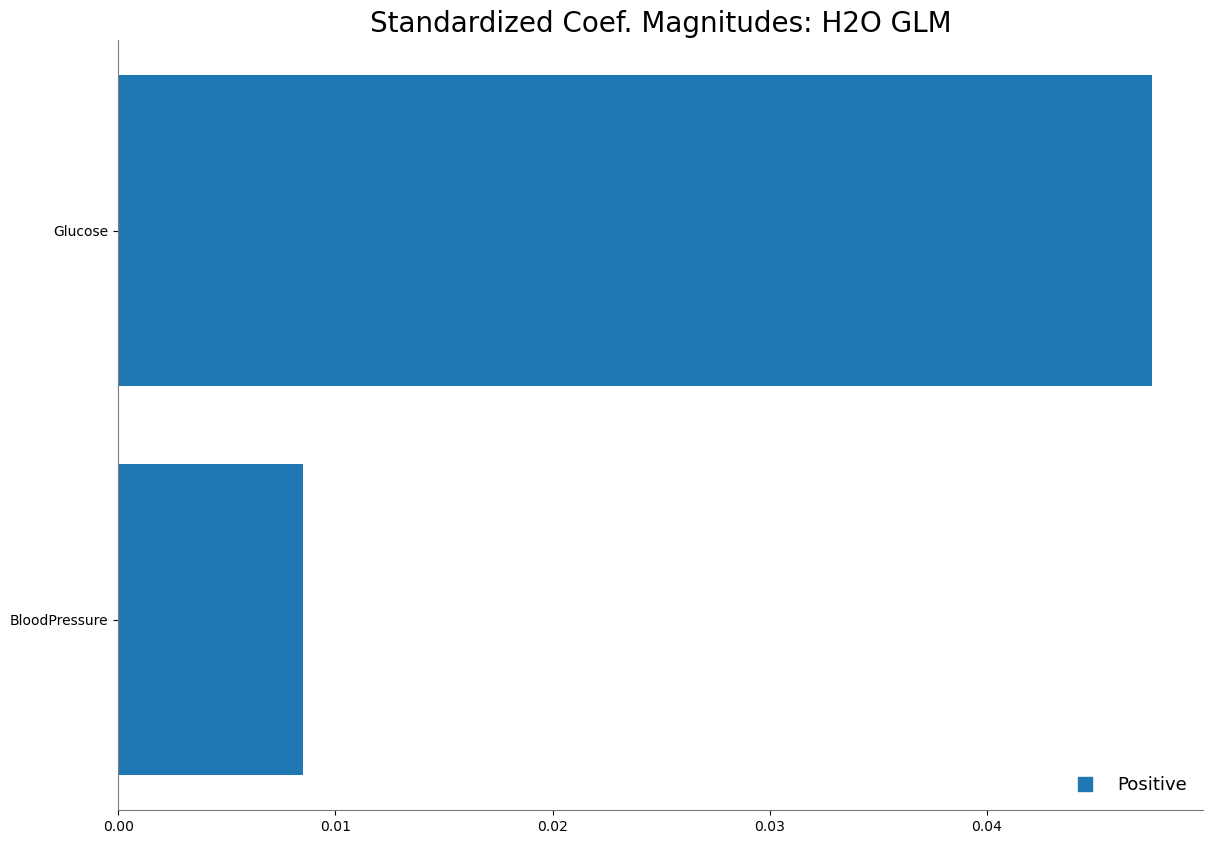

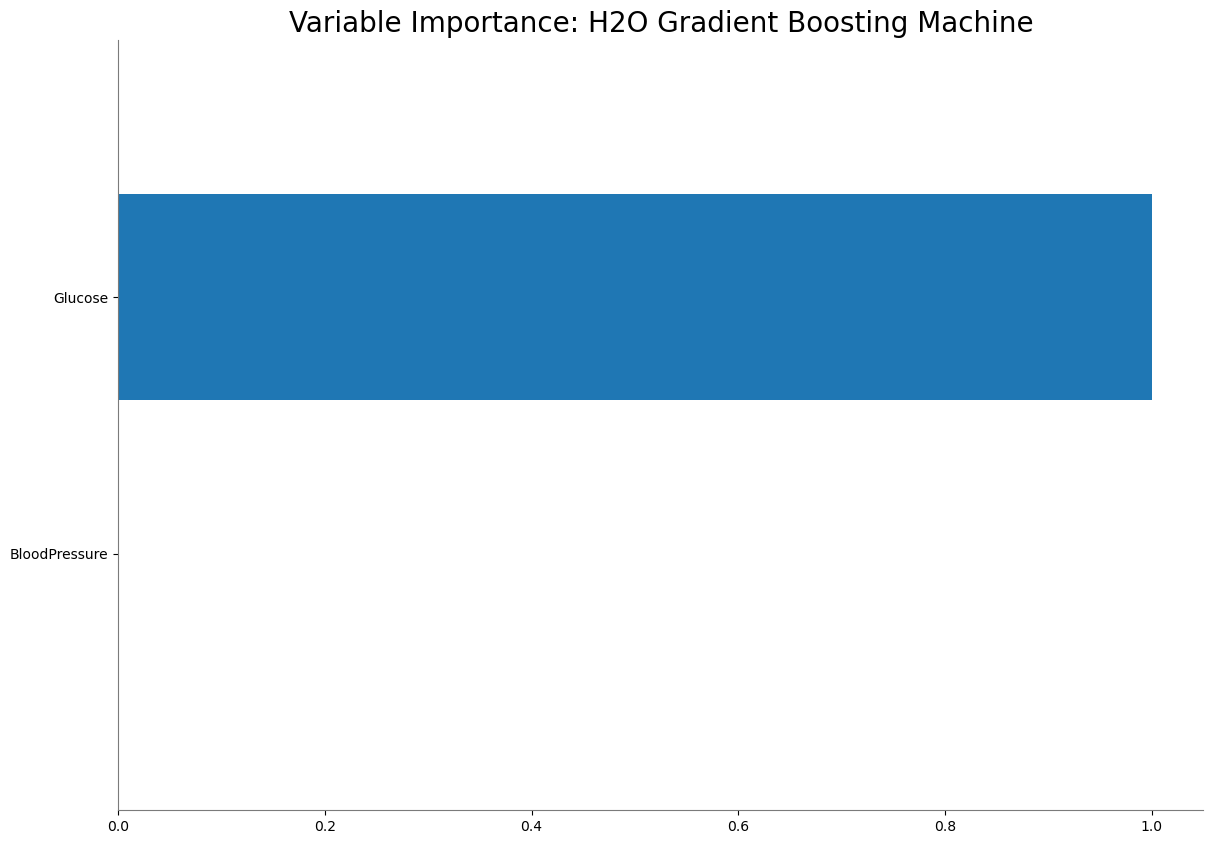

<Figure size 640x480 with 0 Axes>

In [46]:
#to retrive the variable importance
data_glm.std_coef_plot()
data_gbm.varimp_plot()

# ##The provided code contains two commands to create plots for model analysis and interpretation:

data_glm.std_coef_plot(): This command generates a standard coefficient plot for the Generalized Linear Model (GLM) represented by the data_glm object. The standard coefficient plot displays the standardized coefficients for each predictor variable in the GLM. These coefficients indicate the impact and direction (positive or negative) of each predictor variable on the response variable.

data_gbm.varimp_plot(): This command creates a variable importance plot for the Gradient Boosting Machine (GBM) model represented by the data_gbm object. The variable importance plot visualizes the relative importance of each predictor variable in the GBM model. It helps identify which predictor variables have the most significant impact on the model's predictions.

Both of these plots are valuable for model interpretation and understanding the role of individual predictor variables in the model's performance. They provide insights into feature importance, their direction of influence, and their relative significance in the model. These plots can assist in feature selection, identifying strong predictors, and understanding the relationships between variables in our machine learning models.

In [47]:
#to depict best model in h2o
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

 we are retrieving the best-performing model from the leaderboard generated by the H2O AutoML experiment.

In [48]:
best_model.algo

'deeplearning'

Finally we get deep learning as best model in AutoMl generated model as per our dataset.

In [49]:
#if else conditions 
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DeepLearning_grid_1_AutoML_1_20231013_173218_model_5', 'type': 'Key<Model>', 'URL': '/3/Models/DeepLearning_grid_1_AutoML_1_20231013_173218_model_5'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231013_173218_training_py_15_sid_9366', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231013_173218_training_py_15_sid_9366'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20231013_173218_training_py_15_sid_9366', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20231013_173218_training_py_15_sid_9366'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_mod

In [50]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,BloodPressure,1.000000,1.000000,0.67099
1,Glucose,0.490336,0.490336,0.32901


#aml.leaderboard[5,'model_id']: This expression accesses the model identifier in the sixth row (position 5) of the AutoML leaderboard. It retrieves the unique identifier for a specific model ranked at that position.

In [51]:
h2o.cluster().shutdown()

H2O session _sid_9366 closed.


Finally ending h2o algorithm.

# Conclusion of this code

# What This code is exactly doing(model's working)

I'll provide a brief summary of what the code is doing:

1)Import necessary libraries: The code begins by importing various Python libraries and H2O-related modules for data analysis and modeling.

2)Download dataset: It downloads a diabetes dataset from Kaggle using the opendatasets library and specifies the data directory.

3)Data exploration and visualization: The code then explores the data by generating scatter plots and correlation heatmaps using seaborn.

4)Initialize H2O: It initializes H2O cluster for further analysis.

5)Load the dataset with H2O: The dataset is loaded into H2O's data frame for analysis using the h2o.import_file() function.

6)Data split: It splits the data into training and test sets using the split_frame() method.

7)Build and train models: The code builds and trains two models, a Generalized Linear Model (GLM) and a Gradient Boosting Machine (GBM), using H2O's modeling functions.

8)Variable importances: The code calculates and displays variable importances for both models.

9)Explainability: It explains the models by providing feature importance information and plots if the models are XGBoost, DRF, or GBM.

10)AutoML: The code sets up AutoML for automated model selection and training.

11)Train AutoML: It trains AutoML on the dataset with a specified runtime.

12)Leaderboard: The leaderboard of models generated by AutoML is displayed.

13)Model selection: The best model is selected from the leaderboard.

14)Model explanation: If the best model is XGBoost, DRF, or GBM, its variable importances are plotted. Otherwise, the model's parameters are displayed.

15)Other best model: The code also looks at the variable importances for the model that ranks fifth on the leaderboard.






# Did I explain my evaluation clearly?

model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

We have implemented above commands to find the time require and we get the accuracy of the model through cross validation as well as scoring history and these two tables in the output consists all the values such as root mean square,residual deviance and time deviance etc. and hence avoid the overfitting of the data while implementing algorithm ,so yes I have explain my evaluation well through conclusion,abstract as well as this cross validation.
Secondly I have split the data well above in training as well as testing data,so as to remove any sort of overfitting.

# LICENSE

MIT License

Copyright (c) 2023 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References:-
1)AutoMl vs Traditioal ML model-https://www.youtube.com/watch?v=BpK1RMYclsY.
2)The notebbok used for reference-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb.
3)Brief description about Automated ML-https://en.wikipedia.org/wiki/Automated_machine_learning.
4)Dataset used for Analysis-'https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset'
5)For refering the questions and the way to answer-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

# Answer of the given questions-
Answer the following questions for all of the models:

Q1) Is the relationship significant?

ans)A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Insulin’ and ‘glucose’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated?

ans)Assumptions for linear regression are:

Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables pregnency and glucose.


Q3) Is there any multicollinearity in the model?

ans)There is no such multicollinearity in this model as the correlation among the variables in dataset is not that much higher such as (.7) for multicollinearity.,We got this result through below commands-

data_for_corr = pd.read_csv( './diabetes-dataset/diabetes.csv' )
sns.heatmap(data_for_corr.corr(),annot=True)


Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

ans)Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model,and pregnancies and glucose are correlated to each other. Other than those,all other predictors are independent from each other.


Q5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

ans)From the variable importance plot, the most to least important variables are displayed. For my model insulin,glucose,bloodPressure are top 3 most important variables to determine Price. VIF and p-values for pregnancy,skin Thickness,age was high than the ideal values. So those variables were excluded from the model.


Q6) Does the model make sense?

ans)For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.33 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.


Q7) Does regularization help?

ans)Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were  not same in both the cases. Hence it can be concluded that for this model regularization help.


Q8) Which independent variables are significant?

ans)The independent variables important for predictions of AutoMl alogorithm in given dataset were
    1)insulin
    2)Glucose
    3)Blood Pressure
   and these 3 independent variables are important to analyse the dependent variable and that is                      "DiabetesPegigreeFunction".


Q9) Which hyperparameters are important?

ans)Through below commands-
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

   best_model.algo
   
   we get deeplearning as the best hyperparameter through leaderboard command.


Q10) Coding professionalism?

ans)Data Import Using H2O: Importing data using H2O is a good practice, especially if you plan to perform machine learning tasks within the H2O environment. It allows you to take advantage of H2O's features for distributed computing and modeling.

Correlation Analysis: Using a heatmap for correlation analysis is a standard practice for understanding the relationships between variables. It's essential for feature selection and model building.

Implementation of GLM and GBM Models: Implementing both GLM and GBM models is a sound approach. These models have different characteristics, and trying multiple algorithms can help you choose the one that best suits your problem.
Regularization Testing: Repeating the modeling process with and without regularization is a valuable practice. It helps assess whether regularization techniques (such as L1 and L2) improve model performance and generalization.
Coding Professionalism: It's crucial to maintain professionalism in your code. Proper documentation, clear variable names, and comments are essential for code readability and maintainability. It's a good practice to follow consistent coding conventions.

However, I want to emphasize the importance of explaining your analysis and findings in detail, which was one of the criteria mentioned in your initial question regarding evaluation. In your explanation, you should address the evaluation metrics you used, the rationale for your modeling choices, and how you handled overfitting. This helps ensure that your analysis is clear and can be understood by others.

Additionally, if there are specific questions or aspects of your analysis that you'd like further feedback on or if you have any specific concerns, please feel free to ask, and I'll be happy to provide more guidance or clarification.

